In [1]:
import os
SLURM_PATH = '/home/yandex/MLWG2025/amitr5'
CACHE_DIR = f'{SLURM_PATH}/tmp/hf_cache' 

if SLURM_PATH in os.getcwd():
        os.makedirs(CACHE_DIR, exist_ok=True)
        os.environ["PIP_PATH"] = f"{SLURM_PATH}/BaryGNN/anaconda3/envs/conf/bin/pip"
        os.environ["TEMP_DIR"] = CACHE_DIR
        os.environ["HF_HOME"] = CACHE_DIR
        os.environ["TRANSFORMERS_CACHE"] = CACHE_DIR
        os.environ["HF_DATASETS_CACHE"] = CACHE_DIR
        # Hugging Face uses HUGGINGFACE_HUB_CACHE (HF_HUB_CACHE is ignored)
        os.environ["HUGGINGFACE_HUB_CACHE"] = CACHE_DIR
        os.environ["TMPDIR"] = CACHE_DIR
        os.environ["XDG_CACHE_HOME"] = CACHE_DIR
        # os.environ["TOKENIZERS_PARALLELISM"] = "false"


# os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3"

In [2]:
# Imports #
import numpy as np
from transformers import Qwen3VLForConditionalGeneration, AutoProcessor, AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import pandas as pd
# from datasets import load_dataset
# import torch.nn.functional as F
from tqdm.auto import tqdm
# Project imports #

import utils
from mind2web.dataloader import build_datasets_dict, subsample_by_annotation ,MultiChoiceDataset
from utils import CACHE_DIR
from utils import log_response
# sys.path.append('./Mind2Web/src')

/home/yandex/MLWG2025/amitr5/BaryGNN/anaconda3/envs/conf/lib/python3.13/site-packages/transformers/utils/hub.py:110: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [3]:
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-xl", cache_dir=CACHE_DIR)
device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "osunlp/MindAct_ActionPrediction_flan-t5-xl"

# model = AutoModelForSeq2SeqLM.from_pretrained(model_name, cache_dir=CACHE_DIR, device_map="auto")
# model.eval();

In [ ]:
utils.reload('mind2web.dataloader')
id2split = MultiChoiceDataset.id2split
ds_dict = build_datasets_dict(id2split.values(),cache_dir=CACHE_DIR);

mind2web.dataloader- reloaded


Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

Parameter 'function'=<function get_data_split.<locals>.get_score at 0x7510d9462a20> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only shown once. Subsequent hashing failures won't be shown.


Map:   0%|          | 0/1339 [00:00<?, ? examples/s]

In [5]:
utils.reload('mind2web.dataloader')
from mind2web.dataloader import subsample_by_annotation, MultiChoiceDataset
cal_dict, test_dict = {}, {}
seed = 42
frac = 0.1
num_candidates=5
max_context_len=512

for split, ds in ds_dict.items():
    flattened = ds_dict[split]
    cal_set, test_set = subsample_by_annotation(flattened, frac=frac, seed=seed)
    cal_dict[split] = MultiChoiceDataset(
        cal_set, tokenizer, num_candidates=num_candidates, max_context_len=max_context_len, cache_prompt=True, cache_tokenized=True
    )
    test_dict[split] = MultiChoiceDataset(
        test_set, tokenizer, num_candidates=num_candidates, max_context_len=max_context_len,cache_prompt=True, cache_tokenized=True
    )

mind2web.dataloader- reloaded


In [ ]:
import numpy as np
import torch
import pandas as pd
import utils
from utils import helpers

utils.reload('utils.helpers')
data_df = pd.read_pickle("data_set_all.pkl")
data_df = helpers.add_eval_columns(data_df)
# cal_df = pd.read_pickle("cal_df_rnd.pkl")
# cal_df = utils.helpers.add_eval_columns(cal_df)


# cal_action_ids = est_df['action_uid'].unique()
# test_df = data_df[~data_df['action_uid'].isin(cal_action_ids)].reset_index(drop=True)
# test_df.head()

# data_df = pd.read_pickle("answers/Qwen_answers_backup.pkl")
# data_df['pred_text'] = data_df['pred_text'].apply(lambda x: x.replace('Answer:', '').strip())
# data_df = helpers.add_eval_columns(data_df)

utils.helpers- reloaded


In [33]:
from utils import helpers
x = pd.read_pickle("m2w_re_eval_w_human_oracle2.pkl")
# x['pred_text'] = x['pred_text'].apply(lambda x: x.replace('Answer:', '').strip())
x = helpers.add_eval_columns(x)
# data_df
x['correct'].mean()
# data_df = helpers.add_eval_columns(x)
# data_df = data_df[:2000]
 


np.float64(0.45343386998165885)

In [34]:
x['pred_label'].value_counts()
# x['target_label'].value_counts()

pred_label
B    1956
C    1001
A     559
F     530
E     459
D     398
Name: count, dtype: int64

In [ ]:
oracle_df = pd.read_pickle("Qwen_re_eval_human_oracle.pkl")


0       Click the "Reservations" link located within t...
1       Click the element containing the text "Ticket ...
2       None of the provided options correspond to a v...
3       None of the provided options correspond to a v...
4       None of the provided options correspond to a v...
                              ...                        
4902    Click the link labeled "Electronic Gift Cards"...
4903    None of the provided options correspond to pur...
4904    Click the “vintage” link with the “+” symbol l...
4905    None of the provided options correspond to a m...
4906    Click the link that says "Compare 25+ prices" ...
Name: pred_text, Length: 4907, dtype: object

In [25]:
re_eval_df = pd.read_pickle('results/re_eval/shrinkage_answers.pkl')
re_eval_df = re_eval_df[re_eval_df['pred_set_size'] > 1]
re_eval_df.head()
re_eval_df['lambda'].value_counts()

lambda
9.029029    1029
8.908909    1024
8.588589     992
8.848849     970
8.858859     892
Name: count, dtype: int64

In [3]:
x =  pd.read_pickle("Qwen_zero_shot_answers_backup.pkl")
def extract_only_answer(model_output):
    # Split the text into two parts at the tag
    parts = model_output.split("[[ANSWER]]")
    
    if len(parts) > 1:
        # Success: Return everything after the tag (stripped of whitespace)
        return parts[1].strip()
    else:
        # Failure: The tag wasn't found. 
        # Return the original text (fallback) or raise an error depending on your needs.
        return model_output.strip()
x['pred_text'] = x['pred_text'].apply(extract_only_answer)
x['pred_text'] = x['pred_text'].apply(lambda x: x.replace('Answer:', '').strip())
# for i, pred in enumerate(x['pred_text']):
    # print(pred)
x[['pred_text', 'target_text']]
data_df = helpers.add_eval_columns(x)
data_df

,annotation_id,action_uid,pred_text,target_text,choices_logits,test_split,step_idx,choices_probs,target_label,target_action,target_value,pred_label,pred_action,pred_value,correct,target_prob,pred_prob
0,91695df8-f256-47c9-8c37-06e8d0fc758f,73e0e7ed-d784-4b7a-a06c-48324e44ce7b,B.\nAction: CLICK,B.\nAction: CLICK\n,"{'A': 18.90625, 'B': 14.8125, 'C': 14.6953125,...",test_task,0,"{'A': 0.961377739906311, 'B': 0.01603249087929...",B,CLICK,None,B,CLICK,None,True,0.016032,0.016032
1,91695df8-f256-47c9-8c37-06e8d0fc758f,ea2865e4-2858-478c-bf83-93d576cad774,B.\nAction: CLICK,B.\nAction: CLICK\n,"{'A': 18.15625, 'B': 14.484375, 'C': 14.273437...",test_task,1,"{'A': 0.9447712898254395, 'B': 0.0240243487060...",B,CLICK,None,B,CLICK,None,True,0.024024,0.024024
2,91695df8-f256-47c9-8c37-06e8d0fc758f,c70a5d9b-8777-4ff7-a17d-1f76012e14ba,B.\nAction: TYPE\nValue: 08817,B.\nAction: TYPE\nValue: 08817,"{'A': 17.765625, 'B': 14.609375, 'C': 14.42187...",test_task,2,"{'A': 0.9134649634361267, 'B': 0.0389000289142...",B,TYPE,08817,B,TYPE,08817,True,0.038900,0.038900
3,91695df8-f256-47c9-8c37-06e8d0fc758f,3e671043-cab2-4e44-a1ce-3ed9de91d16b,B.\nAction: TYPE\nValue: 04/12/2025,B.\nAction: CLICK\n,"{'A': 17.984375, 'B': 14.6171875, 'C': 14.4140...",test_task,3,"{'A': 0.9263692498207092, 'B': 0.0319472290575...",B,CLICK,None,B,TYPE,04/12/2025,True,0.031947,0.031947
4,91695df8-f256-47c9-8c37-06e8d0fc758f,60888ab2-b605-4886-8dac-6ba72b6cde0a,A.,B.\nAction: CLICK\n,"{'A': 18.75, 'B': 14.6171875, 'C': 14.40625, '...",test_task,4,"{'A': 0.9615086317062378, 'B': 0.0154203968122...",B,CLICK,None,A,None,None,False,0.015420,0.961509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1db97e87-81a4-4ca6-9843-5fcc5e776e8f,73f48d4f-b4ca-4085-900f-e2a2b9025c8b,F.\nAction: CLICK,F.\nAction: CLICK\n,"{'A': 16.828125, 'B': 12.8671875, 'C': 13.125,...",test_domain,6,"{'A': 0.9415397644042969, 'B': 0.0179318599402...",F,CLICK,None,F,CLICK,None,True,0.000729,0.000729
1396,248803b0-b351-403e-8419-96d3cda4ecb5,a1e1bff4-0167-4b84-98b3-40dc3c0760ef,B.\nAction: TYPE\nValue: psychiatrist virtual ...,B.\nAction: TYPE\nValue: psychiatrist,"{'A': 17.515625, 'B': 13.5859375, 'C': 13.875,...",test_domain,0,"{'A': 0.9433844089508057, 'B': 0.0185373257845...",B,TYPE,psychiatrist,B,TYPE,psychiatrist virtual appointment neurodevelopm...,True,0.018537,0.018537
1397,248803b0-b351-403e-8419-96d3cda4ecb5,9de734c2-95a5-4946-950c-04d7b0ba7e65,A.,B.\nAction: CLICK\n,"{'A': 18.15625, 'B': 14.71875, 'C': 14.421875,...",test_domain,1,"{'A': 0.9347796440124512, 'B': 0.0300484430044...",B,CLICK,None,A,None,None,False,0.030048,0.934780
1398,248803b0-b351-403e-8419-96d3cda4ecb5,b772d76f-b920-4e98-8a26-789d3071f65d,B.\nAction: CLICK,B.\nAction: CLICK\n,"{'A': 18.078125, 'B': 14.71875, 'C': 14.632812...",test_domain,2,"{'A': 0.9223204851150513, 'B': 0.0320570692420...",B,CLICK,None,B,CLICK,None,True,0.032057,0.032057


In [9]:
from utils.prompts import get_prompt_template
from utils.llm import BaseWrapper
from mind2web.dataloader import build_datasets_dict, MultiChoiceDatasetRaw

# model = get_wrapper("Qwen")
ds_dict = build_datasets_dict(cache_dir=CACHE_DIR);


# records_df = collect_prompt_predictions(model, datasets, batch_size=1)
# records_df.to_pickle('Qwen_answers.pkl')  

/home/yandex/MLWG2025/amitr5/BaryGNN/anaconda3/envs/conf/lib/python3.13/site-packages/transformers/utils/hub.py:110: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

In [25]:
df = pd.read_pickle('results/re_eval/shrinkage_answers.pkl')
df['ann_id'] = df['annotation_id'].apply(lambda s: s.split('_')[0])
df.groupby('ann_id')
df.head()

,relative_idx,annotation_id,action_uid,output_text,target_text,choices_logits,test_split,rand_idx,step_idx,choices_probs,...,pred_prob,lambda,threshold,pred_set,pred_set_size,seed,risk_level,threshold_alpha,method,ann_id
0,0,91695df8-f256-47c9-8c37-06e8d0fc758f_0,73e0e7ed-d784-4b7a-a06c-48324e44ce7b,B. Action: CLICK,B. Action: CLICK,"{'A': -4.882662909644264, 'B': 5.8642768859863...",0,0,0,"{'A': 2.1481835574377328e-05, 'B': 0.998637735...",...,0.998638,9.029029,0.987321,[B],1,0,0.05,0.1,Shrinkage(Ours),91695df8-f256-47c9-8c37-06e8d0fc758f
1,1,91695df8-f256-47c9-8c37-06e8d0fc758f_0,ea2865e4-2858-478c-bf83-93d576cad774,B. Action: CLICK,B. Action: CLICK,"{'A': -9.906625526564735, 'B': 6.1203889846801...",0,0,1,"{'A': 1.0953131379665138e-07, 'B': 0.999960303...",...,0.999960,9.029029,0.987321,[B],1,0,0.05,0.1,Shrinkage(Ours),91695df8-f256-47c9-8c37-06e8d0fc758f
2,2,91695df8-f256-47c9-8c37-06e8d0fc758f_0,c70a5d9b-8777-4ff7-a17d-1f76012e14ba,B. Action: TYPE Value: 08817,B. Action: TYPE Value: 08817,"{'A': -8.469161885398048, 'B': 6.6064009666442...",0,0,2,"{'A': 2.8360665282889386e-07, 'B': 0.999885916...",...,0.999886,9.029029,0.987321,[B],1,0,0.05,0.1,Shrinkage(Ours),91695df8-f256-47c9-8c37-06e8d0fc758f
3,3,91695df8-f256-47c9-8c37-06e8d0fc758f_0,3e671043-cab2-4e44-a1ce-3ed9de91d16b,B. Action: CLICK,B. Action: CLICK,"{'A': -9.131194131987709, 'B': 6.3486390113830...",0,0,3,"{'A': 1.8930127509975136e-07, 'B': 0.999907612...",...,0.999908,9.029029,0.987321,[B],1,0,0.05,0.1,Shrinkage(Ours),91695df8-f256-47c9-8c37-06e8d0fc758f
4,4,91695df8-f256-47c9-8c37-06e8d0fc758f_0,60888ab2-b605-4886-8dac-6ba72b6cde0a,B. Action: CLICK,B. Action: CLICK,"{'A': -7.415719407218116, 'B': 6.1603984832763...",0,0,4,"{'A': 1.2697946658590809e-06, 'B': 0.999463260...",...,0.999463,9.029029,0.987321,[B],1,0,0.05,0.1,Shrinkage(Ours),91695df8-f256-47c9-8c37-06e8d0fc758f


In [2]:
import pandas as pd
orcale_df = pd.read_pickle("Qwen_re_eval_human_oracle.pkl")
orcale_df.head()

,annotation_id,action_uid,pred_text,target_text,choices_logits
0,91695df8-f256-47c9-8c37-06e8d0fc758f_0,f425232b-adc6-4047-b3ac-d56d8909b7df,"Click the ""Reservations"" link located within t...",B.\nAction: TYPE\nValue: 2,"{'A': 20.265625, 'B': 17.359375, 'C': 19.40625..."
1,9223f1b4-43ad-4636-9541-99ff9e6ad918_0,306d45f6-fbd1-497f-9272-8ac36e680dfb,"Click the element containing the text ""Ticket ...",F.\nAction: CLICK\n,"{'A': 27.796875, 'B': 19.734375, 'C': 21.59375..."
2,9223f1b4-43ad-4636-9541-99ff9e6ad918_0,37a912ac-ce6b-49e6-a217-bca2ec8dc56b,None of the provided options correspond to a v...,F.\nAction: CLICK\n,"{'A': 35.34375, 'B': 22.125, 'C': 23.078125, '..."
3,9223f1b4-43ad-4636-9541-99ff9e6ad918_0,e163fff0-384e-4892-ada9-5dd4ca982b30,None of the provided options correspond to a v...,A.,"{'A': 33.65625, 'B': 22.3125, 'C': 24.140625, ..."
4,9223f1b4-43ad-4636-9541-99ff9e6ad918_0,799e7c53-787c-4e67-a6a5-0e69d11898ca,None of the provided options correspond to a v...,F.\nAction: CLICK\n,"{'A': 32.65625, 'B': 21.5, 'C': 21.921875, 'D'..."


In [30]:
utils.reload('utils.prompts')
datasets = {}
mapping = {}
re_eval_df = pd.read_pickle('results/re_eval/shrinkage_answers.pkl')
for split, test_split in ds_dict.items():
    print(f"Processing split: {split}")
    datasets[split] = MultiChoiceDatasetRaw(
        test_split, num_candidates=5, split_name=split, add_screenshot=False
    )

for split, ds in datasets.items():
    for samp in ds:
        mapping[samp['annotation_id']] = samp
        print(mapping)
        break
    break
    

utils.prompts- reloaded
Processing split: test_task
Processing split: test_domain
Processing split: test_website
{'91695df8-f256-47c9-8c37-06e8d0fc758f': {'annotation_id': '91695df8-f256-47c9-8c37-06e8d0fc758f', 'action_uid': '73e0e7ed-d784-4b7a-a06c-48324e44ce7b', 'html_context': '<html> <div> <a id=0 button> Reservations </a> <div> <li id=1> <a id=2> Trip Ideas </a> </li> <li id=3> <a id=4> Car Rental Las Vegas </a> </li> </div> </div> </html>', 'task': 'Rent a truck with the lowest rent with two dozen furniture pads for 100 miles at zip 08817 on April 12 at 2:30 pm rented truck is to be returned to the exact location and date, and the pickup and drop off will be at the nearest location.', 'previous_actions': '', 'choices': 'A. None of the above\nB. <a id=0 button> Reservations </a>\nC. <li id=1> <a id=2> Trip Ideas </a> </li>\nD. <a id=2> Trip Ideas </a>\nE. <li id=3> <a id=4> Car Rental Las Vegas </a> </li>\nF. <a id=4> Car Rental Las Vegas </a>\n', 'target_text': 'B.\nAction: CLIC

In [49]:
utils.reload('utils.prompts')
from utils.prompts import get_prompt_template 
prompt_template=get_prompt_template('re_eval_with_context')

def filter_choices_str(choices_str: str, keep_labels):
    """Keep only choices whose leading label (e.g., 'A') is in keep_labels."""
    keep = set(keep_labels)
    lines = []
    for line in choices_str.splitlines():
        line = line.strip()
        if not line:
            continue
        label, _, rest = line.partition(".")
        if label and label.strip() in keep:
            lines.append(f"{label.strip()}.{rest}")
    return "\n".join(lines) + ("\n" if lines else "")

for k in datasets:
    x = datasets[k]
    x = x[0]
    print(x)
    print('----')
    temp = filter_choices_str(x['choices'], ['A', 'B'])
    x['choices'] = temp
    print(x['choices'])
    prompt = prompt_template.safe_substitute(**x)
    break
print(prompt)
# prompt = prompt_template.safe_substitute(
#             html=elements["html_context"],
#             task=elements["task"],
#             prev_actions=elements["previous_actions"],
#             choices=elements["choices_str"],
#         )

utils.prompts- reloaded
{'annotation_id': '91695df8-f256-47c9-8c37-06e8d0fc758f', 'action_uid': '73e0e7ed-d784-4b7a-a06c-48324e44ce7b', 'html_context': '<html> <div> <a id=0 button> Reservations </a> <div> <li id=1> <a id=2> Trip Ideas </a> </li> <li id=3> <a id=4> Car Rental Las Vegas </a> </li> </div> </div> </html>', 'task': 'Rent a truck with the lowest rent with two dozen furniture pads for 100 miles at zip 08817 on April 12 at 2:30 pm rented truck is to be returned to the exact location and date, and the pickup and drop off will be at the nearest location.', 'previous_actions': '', 'choices': 'A. None of the above\nB. <a id=0 button> Reservations </a>\nC. <li id=1> <a id=2> Trip Ideas </a> </li>\nD. <a id=2> Trip Ideas </a>\nE. <li id=3> <a id=4> Car Rental Las Vegas </a> </li>\nF. <a id=4> Car Rental Las Vegas </a>\n', 'target_text': 'B.\nAction: CLICK\n'}
----
A. None of the above
B. <a id=0 button> Reservations </a>


You are a visual web assistant. Analyze the attached Screen

In [81]:
re_eval_df = pd.read_pickle('results/re_eval/shrinkage_answers.pkl')
print(re_eval_df['correct'].mean(), sum(re_eval_df['pred_set_size'] > 1)/len(re_eval_df))
temp = re_eval_df.copy()
re_eval_df['covered'] = temp.apply(lambda x: x['target_label'] in x['pred_set'], axis=1) 
temp = temp[temp['pred_set_size'] > 1].reset_index(drop=True)
print(re_eval_df['pred_set_size'].value_counts())
print(temp['correct'].mean())
mask = (~temp['pred_set'].apply(lambda s: 'A' in s))
temp[mask]
agg = (
    re_eval_df.groupby('pred_set_size')[['correct', 'covered']]
    .mean()
    .reset_index()
    .rename(columns={'correct': 'accuracy'})
)
print(agg)



0.8713304184884447 0.2554132833645638
pred_set_size
1    14305
6     3372
2      659
5      469
3      239
4      168
Name: count, dtype: int64
0.5463623395149786
   pred_set_size  accuracy   covered
0              1  0.982803  0.982803
1              2  0.698027  0.872534
2              3  0.715481  0.907950
3              4  0.744048  0.964286
4              5  0.658849  0.908316
5              6  0.479241  1.000000


In [9]:
from utils import helpers
name = "Qwen_re_eval_m2w_few_shots_with_screen_backup"
name = "Qwen_re_eval_zero_shot_no_screen_backup"
x = pd.read_pickle(f'{name}.pkl')
print(x.iloc[0]['pred_text'])
# x['pred_text'] = x['pred_text'].apply(lambda x: x.replace('Answer:', '').strip())
# x['pred_text'] = x['pred_text'].apply(lambda x: x.split('Answer:')[-1].strip())
x['pred_text'] = x['pred_text'].apply(extract_only_answer)
data_df = helpers.add_eval_columns(x)

# data_df = data_df[:900]
print(data_df['correct'].mean())



# data_df[['pred_label', 'target_label', 'correct']].mask(mask)
# x = data_df[['action_uid', 'pred_label', 'target_label', 'correct']]
data_df['pred_label'].value_counts()
# len(x)

[[THOUGHT]]
The task is to rent a truck with specific parameters, and the previous actions indicate we are in the process of selecting add-ons or finalizing the reservation. The current HTML context shows a navigation bar with a "Reservations" link (Option E), which is likely the main navigation item for managing or reviewing reservations.

- Option B is an input field with placeholder text "0" — irrelevant to the task since we are not entering a value here.
- Option C, D, and E are all variations of the "Reservations" link. Option E is the most direct and minimal representation of the element — it’s the actual anchor tag with the text "Reservations" and ID "3". Since the task involves finalizing or managing a reservation, clicking this link would logically take us to the reservation management page.
- Option F is for "Commercial Rental Add-ons", which is unrelated to the current task of finalizing a truck rental with specific parameters.
- Option A is invalid since Option E is a valid

pred_label
A    1400
B     952
F     326
E     121
D     103
C      59
Name: count, dtype: int64

0                     E.\nAction: CLICK
1                                    A.
2                                    A.
3                                    A.
4                                    A.
                     ...               
2895                  B.\nAction: CLICK
2896    B.\nAction: TYPE\nValue: Kansas
2897                  B.\nAction: CLICK
2898                                 A.
2899                  B.\nAction: CLICK
Name: pred_text, Length: 2900, dtype: object

In [ ]:
x = pd.read_pickle("results/re_eval/re_eval_results_22.pkl")
x['correct'] = x['pred_label'] == x['label']
x['correct'].mean()
# x['pred_set'] = 
# x[x['pred_set_size'] > 1]['correct'].mean()

# x['pred_label'].value_counts()

5646

In [27]:

x = pd.read_pickle(f'{name}.pkl')

x['pred_text'] = x['pred_text'].apply(lambda x: x.split('Answer:')[-1].strip())
x['pred_text']

NameError: name 'name' is not defined

In [ ]:

from scipy.optimize import minimize
from sklearn.metrics import log_loss

def find_optimal_temperature(logits, labels):
    """
    Finds the optimal Temperature T to minimize NLL on the calibration set.
    
    Args:
        logits: Numpy array of shape (N, K) containing unscaled logits.
        labels: Numpy array of shape (N,) containing true class indices.
        
    Returns:
        optimal_T: The scalar temperature value.
    """
    
    # 1. Define the NLL objective function for a given T
    def nll_with_temperature(T):
        # Avoid division by zero
        T = max(T[0], 1e-6) 
        
        # Scale logits
        scaled_logits = logits / T
        
        # Compute Softmax probabilities
        # (Subtract max for numerical stability)
        exp_logits = np.exp(scaled_logits - np.max(scaled_logits, axis=1, keepdims=True))
        probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
        
        # Calculate NLL (Log Loss)
        # We use sklearn's log_loss for convenience; it handles the log math safely
        return log_loss(labels, probs,labels=np.arange(6))

    # 2. Optimize T starting from 1.0 (unscaled)
    # We constrain T to be positive (> 0)
    result = minimize(
        fun=nll_with_temperature,
        x0=np.array([1.0]),
        method='L-BFGS-B',
        bounds=[(0.01, 5.0)]
    )
    
    optimal_T = result.x[0]
    return optimal_T

def top_mass_pred_set(probs_dict, alpha):
    # probs_dict: mapping label -> prob
    items = sorted(probs_dict.items(), key=lambda kv: kv[1], reverse=True)
    labels, probs = zip(*items) if items else ([], [])
    probs = np.array(probs, float)
    cutoff = 1.0 - alpha
    # take until cumulative mass >= cutoff
    k = np.searchsorted(probs.cumsum(), cutoff) + 1  # +1 to include crossing element
    return list(labels[:k])

def split_to_cal_penalty(cal_df: pd.DataFrame, seed: int = 0, frac: float = 0.5):
    """
    Split cal_df by unique annotation_id into two DataFrames (cal, pen) deterministically.

    Args:
        cal_df: DataFrame with an 'annotation_id' column.
        seed: RNG seed for reproducibility.
        frac: Fraction of unique annotation_ids to put in the first split.

    Returns:
        cal_split_df, pen_split_df
    """
    ids = cal_df["annotation_id"].dropna().unique()
    rng = np.random.RandomState(seed)
    rng.shuffle(ids)
    cut = int(len(ids) * frac)
    cal_ids = set(ids[:cut])
    pen_ids = set(ids[cut:])
    cal_split = cal_df[cal_df["annotation_id"].isin(cal_ids)].reset_index(drop=True)
    pen_split = cal_df[cal_df["annotation_id"].isin(pen_ids)].reset_index(drop=True)
    return cal_split, pen_split

def super_naive(df, risk_level, thresh_alpha, seed,temp=1, test_df=None, cal_df=None):
    def split_rnd(df: pd.DataFrame, seed: int = 0, frac: float = 0.5):    
        rng = np.random.RandomState(seed)
        perm = rng.permutation(len(df))
        cut = int(len(df) * frac)
        cal_idx = perm[:cut]
        pen_idx = perm[cut:]
        cal_split = df.iloc[cal_idx].reset_index(drop=True)
        pen_split = df.iloc[pen_idx].reset_index(drop=True)
        return cal_split, pen_split


    if not isinstance(test_df, pd.DataFrame) or not isinstance(test_df, pd.DataFrame):
        test_df, cal_df = split_rnd(df, frac=0.8, seed=seed)

    
    # test_df, cal_df = split_to_cal_penalty(df, frac=0.8, seed=seed)
    # if temp != 1:
    cal_df = utils.helpers.add_eval_columns(cal_df, to_save=False, logits_temp=temp)

    epsilon = 1e-6    
 
    
    N = len(cal_df)
    noise = np.random.uniform(0, epsilon, size=N)
    scores = 1 - cal_df['target_prob']# + noise
    
    q_level = np.ceil((N + 1) * (1 - thresh_alpha)) / N
    q_level = min(1.0, max(0.0, q_level))
  
    threshold = np.quantile(scores, q=q_level, method='higher')
    result_df = test_df.copy()
    result_df = utils.helpers.add_eval_columns(result_df, threshold=threshold, to_save=False, logits_temp=temp)
    result_df['lambda'] = 0
    result_df['threshold'] = threshold
    return result_df

In [99]:
import utils
utils.reload('utils.helpers')


def get_threshold(cal_df, alpha: float, add_noise=False, seed=None):
    epsilon = 1e-6    
    # google's nonconformity score
    cal_grouped = cal_df.groupby('annotation_id')
    noise = np.random.uniform(0, epsilon, size=len(cal_grouped))
    score_per_group = 1 - cal_grouped['target_prob'].min() + (noise if add_noise else 0)
    
    N = len(score_per_group)
    # k = int(np.ceil((N + 1) * (1 - alpha)))
    # sorted_scores = np.sort(score_per_group.values)
    # threshold = sorted_scores[k - 1]
    q_level = np.ceil((N + 1) * (1 - alpha)) / N
    q_level = min(1.0, max(0.0, q_level))

    threshold = np.quantile(score_per_group, q=q_level, method='higher')
    return threshold

def summarize_metrics(result_df, risk_level, thresh_alpha, method_name):
    result_df = result_df.copy()
    result_df['target_in_pred_set'] = result_df.apply(lambda row: row['target_label'] in row['pred_set'], axis=1)
    result_df['fp'] = result_df.apply(lambda row: (row['pred_label'] == 'A')&(row['target_label'] != 'A'), axis=1)
    result_df['true_not_A'] = result_df.apply(lambda row: row['target_label'] != 'A', axis=1)
    result_df['is_pred_A'] = result_df.apply(lambda row: row['pred_label'] == 'A', axis=1)

    # result_df_seed = result_df.groupby('seed').mean(numeric_only=True).reset_index()
    # task_results = result_df.groupby(['seed', 'annotation_id'])
    # result_df = result_df_seed
    task_results = result_df.groupby('annotation_id')
    return {
        "method": method_name,
        "risk_level": risk_level,
        "lambda": result_df["lambda"].iloc[0],
        "threshold_alpha": thresh_alpha,
        "threshold": result_df["threshold"].iloc[0],
        "accuracy": result_df["correct"].mean(),
        "accuracy_per_task": task_results["correct"].mean().mean(),
        "pred_set_avg": result_df["pred_set_size"].mean(),
        "pred_set_median": result_df["pred_set_size"].median(),
        "pred_set_avg_per_task": task_results["pred_set_size"].mean().mean(),
        "pred_set_median_per_task": task_results["pred_set_size"].median().median(),
        "ask_prob": (result_df["pred_set_size"] > 1).mean(),
        "ask_prob_per_task": task_results["pred_set_size"].apply(lambda x: (x > 1).mean()).mean(),
        "target_in_pred_set": result_df["target_in_pred_set"].mean(),
        "target_in_pred_set_per_task": task_results["target_in_pred_set"].mean().mean(),
        "task_completion_rate": task_results['correct'].all().mean(),
        "task_coverage_rate": task_results['target_in_pred_set'].all().mean(),
        "fp_rate": result_df["fp"].sum() / (result_df['target_label'] != 'A').sum(),
        "fp_rate_per_task": task_results.apply(lambda x: x["fp"].sum() / (x['target_label'] != 'A').sum() if (x['target_label'] != 'A').sum() > 0 else 0, include_groups=False).mean(),
        "pred_A": (result_df['pred_label'] == 'A').mean(), "pred_A_correct": ((result_df['pred_label'] == 'A') & (result_df['target_label'] == 'A')).sum() / (result_df['target_label'] == 'A').sum(),
        
        # "fp_rate": result_df["fp"].sum() / result_df['true_not_A'].sum(),
        # "fp_rate_per_task": task_results.apply(lambda x: x["fp"].sum() / (x['true_not_A']).sum() if (x['true_not_A']).sum() > 0 else 0, include_groups=False).mean(),
        # "pred_A": result_df['is_pred_A'].mean(), "pred_A_correct": ((result_df['is_pred_A'].astype(bool)) & (~result_df['true_not_A'].astype(bool))).sum() / (result_df['is_pred_A']).sum(),
    }

def format_metrics(df):
    def r(x):  # round floats to 4
        return round(x, 4) if isinstance(x, float) else x
    row = df.mean(axis=0, numeric_only=True).to_dict()
    outs = [
        f"lambda({r(row['risk_level']):.2f}):{r(row['lambda'])}, "
        f"threshold({r(row['threshold_alpha']):.2f}): {r(row['threshold'])}",
        f"Accuracy: {r(row['accuracy'])}, accuracy_per_task: {r(row['accuracy_per_task'])}",
        (
            f"Pred set size: avg: {r(row['pred_set_avg'])}, median: {r(row['pred_set_median'])}, "
            f"avg_per_task: {r(row['pred_set_avg_per_task'])}, med_per_task: {r(row['pred_set_median_per_task'])}"
        ),
        f"Target in pred set {r(row['target_in_pred_set'])}, per_task: {r(row['target_in_pred_set_per_task'])}, task_coverage_rate: {r(row['task_coverage_rate'])}, task_completion_rate {r(row['task_completion_rate'])}",
        f"FP rate {r(row['fp_rate'])}, per_task: {r(row['fp_rate_per_task'])}",
        f"Ask prob {r(row['ask_prob'])}, per_task: {r(row['ask_prob_per_task'])}",
        f"Pred A: {r(row['pred_A'])}, Pred A correct: {r(row['pred_A_correct'])}",
    ]
    print('Evaluation Results:')
    for line in outs:
        print(line)

def apply_shrinkage_to_df(df, shrinkage, threshold=None, temp=1, shrinkage_type='linear'):
    df = df.copy()
    shrinkage_functions = {
        'linear': lambda x: x - np.abs(x)*shrinkage,
        'constant': lambda x: x - shrinkage,
        'CRC': lambda x: x if x > shrinkage else x - 100,
        'random': lambda x: x - 100 if  np.random.rand() < 0.95 else x,
    }
    def apply_shrinkage_logits(logits_dict, shrinkage_type):
        logits = np.array([v for v in logits_dict.values()])
        # logits[0] = logits[0] - shrinkage
        # logits[0] = logits[0] - np.abs(logits[0]) * ( shrinkage)
        logits[0] = shrinkage_functions[shrinkage_type](logits[0])
        return dict(zip(logits_dict.keys(), logits))
    
    shrinkage_type = shrinkage_type if shrinkage_type in shrinkage_functions else 'constant'
    apply_shrinkage = partial(apply_shrinkage_logits, shrinkage_type=shrinkage_type)
    df['choices_logits'] = df['choices_logits'].apply(apply_shrinkage)
    
    preds = df['choices_logits'].apply(lambda x: max(x, key=x.get))
    df['output_text'] = preds + df['output_text'].str[1:]
    df = utils.helpers.add_eval_columns(df, threshold=threshold, logits_temp=temp)
    return df

def naive_cp_procedure(df, risk_level, thresh_alpha, seed,temp=1, test_df=None, cal_df=None):
    if not isinstance(test_df, pd.DataFrame) or not isinstance(test_df, pd.DataFrame):
        test_df, cal_df = split_to_cal_penalty(df, frac=0.8, seed=seed)
    # test_df, cal_df = split_to_cal_penalty(df, frac=0.8, seed=seed)
    if temp != 1:
        cal_df = utils.helpers.add_eval_columns(cal_df, to_save=False, logits_temp=temp)
    
    threshold = get_threshold(cal_df, alpha=thresh_alpha)
    result_df = test_df.copy()
    result_df = utils.helpers.add_eval_columns(result_df, threshold=threshold, to_save=False, logits_temp=temp)
    result_df['lambda'] = 0
    result_df['threshold'] = threshold
    return result_df


def no_a_procedure(df, risk_level, thresh_alpha, seed,temp=1):
    test_df, cal_df = split_to_cal_penalty(df, frac=0.8, seed=seed)
    best_lambda = 100
    
    cal_df = apply_shrinkage_to_df(cal_df, shrinkage=best_lambda, temp=temp, shrinkage_type='no_A')
    threshold = get_threshold(cal_df, alpha=thresh_alpha)
    
    result_df = apply_shrinkage_to_df(test_df,shrinkage=best_lambda, threshold=threshold, temp=temp, shrinkage_type='no_A')
    result_df['lambda'] = best_lambda
    result_df['threshold'] = threshold
    return result_df

def simple_set_procedure(df, risk_level, thresh_alpha, seed,temp=1):
    test_df, cal_df = split_to_cal_penalty(df, frac=0.8, seed=seed)
    best_lambda = 0
    
    
    logits = cal_df['choices_logits'].apply(lambda x: np.array([v for v in x.values()])).to_list()
    true_labels = np.array(cal_df['target_label'].apply(lambda x: ord(x) - ord('A')).to_list())
    best_T = find_optimal_temperature(np.array(logits), true_labels)

    # result_df = utils.helpers.add_eval_columns(test_df, logits_temp=best_T)
    result_df = apply_shrinkage_to_df(test_df, shrinkage=6, temp=best_T, shrinkage_type='constant')
    
    result_df['pred_set'] = result_df['choices_probs'].apply(lambda d: top_mass_pred_set(d, alpha=thresh_alpha))
    result_df['pred_set_size'] = result_df['pred_set'].apply(len)

    
    result_df['lambda'] = -1
    result_df['threshold'] = -1
    return result_df


def shrinkage_procedure(df, risk_level, thresh_alpha, seed, temp=1, lambda_grid=None, shrinkage_type='constant', test_df=None,cal_df=None):
    if not isinstance(test_df, pd.DataFrame) or not isinstance(test_df, pd.DataFrame):
        test_df, cal_df = split_to_cal_penalty(df, frac=0.8, seed=seed)
    cal_df, pen_df = split_to_cal_penalty(cal_df, frac=0.5, seed=seed)
    
    if lambda_grid is None:
        lambda_grid = np.linspace(-5.0, 10,2000) if shrinkage_type == 'linear' else np.linspace(0, 10.0, 1000)
        # lambda_grid = lambda_grid if shrinkage_type != 'CRC' else np.linspace(-10, 10, 1000)
        lambda_grid = lambda_grid if shrinkage_type != 'CRC' else np.linspace(-10, 10, 2000)

    
    best_lambda, results = utils.helpers.best_lambda_from_df(cal_df=pen_df, alpha=risk_level, lambda_grid=lambda_grid, shrinkage_type=shrinkage_type)
    
    cal_df = apply_shrinkage_to_df(cal_df, shrinkage=best_lambda, temp=1, shrinkage_type=shrinkage_type)
    threshold = get_threshold(cal_df, alpha=thresh_alpha)
    result_df = test_df.copy()
    result_df['lambda'] = best_lambda
    result_df['threshold'] = threshold
    result_df = apply_shrinkage_to_df(result_df, shrinkage=best_lambda, threshold=threshold, temp=1, shrinkage_type=shrinkage_type)
    return result_df

def only_shrinkage_procedure(df, risk_level, thresh_alpha, seed, temp=1, lambda_grid=None, shrinkage_type='linear'):
    test_df, cal_df = split_to_cal_penalty(df, frac=0.8, seed=seed)
    # cal_df, pen_df = split_to_cal_penalty(cal_df, frac=0.5, seed=seed)
    
    if lambda_grid is None:
        lambda_grid = np.linspace(0.0, 5,1000) if shrinkage_type == 'linear' else np.linspace(0.0, 10.0, 1000)
        # lambda_grid = np.linspace(0.0, 3, 1000)
    
    # best_lambda, results = utils.helpers.best_lambda_from_df(cal_df=pen_df, alpha=risk_level, lambda_grid=lambda_grid, shrinkage_type=shrinkage_type)
    # best_lambda = 7.5
    if shrinkage_type != 'comb':
        cal_df = apply_shrinkage_to_df(cal_df, shrinkage=100, temp=temp, shrinkage_type=shrinkage_type)
        
        logits = cal_df['choices_logits'].apply(lambda x: np.array([v for v in x.values()])).to_list()
        true_labels = np.array(cal_df['target_label'].apply(lambda x: ord(x) - ord('A')).to_list())
        best_T = find_optimal_temperature(np.array(logits), true_labels)
        cal_df = utils.helpers.add_eval_columns(cal_df, to_save=False, logits_temp=best_T)
        threshold = get_threshold(cal_df, alpha=thresh_alpha)
    else:
        threshold = 100
    


    result_df = test_df.copy()
    result_df['lambda'] = 100
    result_df['threshold'] = threshold
    result_df = apply_shrinkage_to_df(result_df, shrinkage=100, threshold=threshold, temp=best_T, shrinkage_type=shrinkage_type)
    return result_df


def evaluation(df, seed=0, risk_level=0.1, thresh_alpha=0.1, method_name='naive_cp', **kwargs):
    eval_to = f'eval_results/flan_t5_xl/frac_0.1/seed_{seed}'
    df = df.copy()
    # cal_df = utils.helpers.filter_to_calibration_actions(full_df, cal_df)
    # pen_df = utils.helpers.filter_to_calibration_actions(full_df, pen_df)

    
    # lambda_grid = np.linspace(5.0, 9.0, 50000)
    

    # pen_df = utils.helpers.add_eval_columns(pen_df, to_save=True, save_path=f'{eval_to}/pen/pen_{seed}.pkl')
    if method_name not in PROCEDURE_STRATEGIES:
        raise ValueError(f"Unknown method name: {method_name}")
    
    procedure = PROCEDURE_STRATEGIES[method_name]
    
    # cal_df = utils.helpers.add_eval_columns(cal_df, to_save=True, save_path=f'{eval_to}/cal/cal_{seed}.pkl')
    
    # result_df = evaluate_splits(test_df, model, tokenizer, shrinkage=best_lambda)
    result_df = procedure(df, risk_level=risk_level, thresh_alpha=thresh_alpha, seed=seed, **kwargs)
    result_df['seed'] = seed
    result_df["annotation_id"] = result_df["annotation_id"].astype(str) + f"_{seed}"
    result_df['risk_level'] = risk_level
    result_df['threshold_alpha'] = thresh_alpha
    return result_df, summarize_metrics(result_df, risk_level, thresh_alpha, method_name)

def apply_temperature_to_df(df, temp, threshold=None):
    def apply_temp_logits(logits_dict):
        logits = np.array([v for v in logits_dict.values()])
        logits = logits / temp
        return dict(zip(logits_dict.keys(), logits))
       
    df['choices_logits'] = df['choices_logits'].apply(apply_temp_logits)
    
    preds = df['choices_logits'].apply(lambda x: max(x, key=x.get))
    df['output_text'] = preds + df['output_text'].str[1:]
    df = utils.helpers.add_eval_columns(df, threshold=threshold)
    return df

def simulation(method_name, df, n_times=1, risk_level=0.1, thresh_alpha=0.1, to_save=True):
    df = df.copy()
    if "test_split" in df.columns:
        df["test_split"] = df["test_split"].astype(str)
    # df = apply_temperature_to_df(df, temp=6)
    results = []
    metrics = []
    for i in range(n_times):
        result, metric = evaluation(df, seed=i, risk_level=risk_level, thresh_alpha=thresh_alpha, method_name=method_name)
        results.append(pd.DataFrame(result))
        metrics.append(metric)
    results_df = pd.concat(results, ignore_index=True)
    metrics_df = pd.DataFrame(metrics)
    results_df['method'] = method_name

    if to_save:
        results_df.to_pickle(f'results/simulation/results_{method_name}_risk{risk_level}_thresh{thresh_alpha}_n{n_times}.pkl')
        # metrics_df.to_pickle(f'results/metrics/{method_name}/{method_name}_risk{risk_level}_thresh{thresh_alpha}_n{n_times}.pkl')
    return results_df, metrics_df

from sklearn.model_selection import KFold

def kfold_cal_penalty(df: pd.DataFrame, n_splits: int = 5, seed: int = 0):
    """
    Yield (cal_split_df, pen_split_df) for each fold, splitting by annotation_id.
    """
    ids = df["annotation_id"].dropna().unique()
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)

    for train_idx, test_idx in kf.split(ids):
        cal_ids = set(ids[train_idx])
        pen_ids = set(ids[test_idx])
        cal_split = df[df["annotation_id"].isin(cal_ids)].reset_index(drop=True)
        pen_split = df[df["annotation_id"].isin(pen_ids)].reset_index(drop=True)
        yield cal_split, pen_split


def k_fold_simulation(method_name, df, n_times=1, risk_level=0.1, thresh_alpha=0.1, to_save=True):
    n_splits: int = 5
    df = df.copy()

    df["test_split"] = df["test_split"].astype(str)
    # df = apply_temperature_to_df(df, temp=6)
    results = []
    metrics_df_list = []
    for i in range(n_times):
        metrics = []
        for test_df, cal_df in kfold_cal_penalty(df, seed=i):
            result, metric = evaluation(df, seed=i, risk_level=risk_level, thresh_alpha=thresh_alpha, method_name=method_name, test_df=test_df, cal_df=cal_df)
            results.append(pd.DataFrame(result))
            metrics.append(metric)
        met_df = pd.DataFrame(metrics)
        met_df = pd.DataFrame(met_df.mean(numeric_only=True)).T
        metrics_df_list.append(met_df)
    results_df = pd.concat(results, ignore_index=True)
    # metrics_df = pd.DataFrame(metrics)
    metrics_df = pd.concat(metrics_df_list)
    results_df['method'] = method_name

    # if to_save:
    #     # results_df.to_pickle(f'results/simulation/results_{method_name}_risk{risk_level}_thresh{thresh_alpha}_n{n_times}.pkl')
    #     metrics_df.to_pickle(f'results/metrics/{method_name}/{method_name}_risk{risk_level}_thresh{thresh_alpha}_n{n_times}.pkl')
    return results_df, metrics_df


from functools import partial
def simes_method(df, risk_level, thresh_alpha, seed, temp=1, lambda_grid=None, shrinkage_type='linear', test_df=None, cal_df=None):
    if not isinstance(test_df, pd.DataFrame) or not isinstance(test_df, pd.DataFrame):
        test_df, cal_df = split_to_cal_penalty(df, frac=0.8, seed=seed)
    episodes = cal_df.groupby('annotation_id')
    p_vals = 1 - episodes.apply(lambda x: min(len(x) * np.sort(x['target_prob']) / np.arange(1, len(x)+1)), include_groups=False)

    N = len(p_vals)
    q_level = np.ceil((N + 1) * (1 - thresh_alpha)) / N
    q_level = min(1.0, max(0.0, q_level))
    threshold = np.quantile(p_vals, q=q_level, method='higher')
    result_df = test_df.copy()
    result_df = utils.helpers.add_eval_columns(result_df, threshold=threshold, to_save=False, logits_temp=temp)
    result_df['lambda'] = 0
    result_df['threshold'] = threshold
    return result_df

def simes_shrink(df, risk_level, thresh_alpha, seed, temp=1, lambda_grid=None, shrinkage_type='constant',  test_df=None, cal_df=None):
    if not isinstance(test_df, pd.DataFrame) or not isinstance(test_df, pd.DataFrame):
        test_df, cal_df = split_to_cal_penalty(df, frac=0.6, seed=seed)

    cal_df, pen_df = split_to_cal_penalty(cal_df, frac=0.5, seed=seed)
    pen_df, pen_df2 = split_to_cal_penalty(pen_df, frac=0.7, seed=seed)

    def find_thresh(stage_group):
        scores = 1 - stage_group['target_prob']
        N = len(scores)
        q_level = np.ceil((N + 1) * (1 - thresh_alpha)) / N
        q_level = min(1.0, max(0.0, q_level))
        return np.quantile(scores, q=q_level, method='higher')
    
    lambda_grid = np.linspace(0, 10.0, 1000)
    best_lambda, results = utils.helpers.best_lambda_from_df(cal_df=pen_df, alpha=risk_level, lambda_grid=lambda_grid, shrinkage_type=shrinkage_type)
    cal_df = apply_shrinkage_to_df(cal_df, shrinkage=best_lambda, temp=temp, shrinkage_type=shrinkage_type)
    pen_df2 = apply_shrinkage_to_df(pen_df2, shrinkage=best_lambda, temp=temp, shrinkage_type=shrinkage_type)
    
    stages = pen_df2.groupby('step_idx')
    lambdas = stages.apply(lambda x: find_thresh(x), include_groups=False)
    
    def calculate_simes_score(group):
        probs = group['target_prob'].values
        
        # Safety check for NaNs (optional but recommended)
        if np.isnan(probs).any():
            return np.nan

        step_idx = group['step_idx'].iloc[0]
        
        if step_idx in lambdas.index:
            lamb_idx = lambdas[lambdas.index == step_idx].index[0]
            lamb = lambdas.iloc[lamb_idx]
        else:
            lamb_idx = np.abs(lambdas.index - step_idx).argmin()
            lamb = lambdas.iloc[lamb_idx]

        
        frac = 0.8
        sigma = lamb*frac + lambdas.mean()*(1-frac)
        errors = (probs)/(sigma + 1e-6) 
        return min(np.min(errors), 1.0)

    p_vals = cal_df.groupby('annotation_id',).apply(calculate_simes_score,  include_groups=False)
    threshold = find_thresh(p_vals.to_frame(name='target_prob'))

    
    result_df = apply_shrinkage_to_df(test_df, shrinkage=best_lambda, threshold=threshold, temp=temp, shrinkage_type=shrinkage_type)
    for i, lamb in enumerate(lambdas):
        result_df.loc[result_df['step_idx'] == lambdas.index[i], 'lambda'] = lamb
    # result_df['lambda'] = 0
    result_df['threshold'] = threshold
    return result_df

def bootstrap_threshold_by_step(
    df,
    step_idx,
    B=1000,
    alpha=0.1,
    score_col="target_prob",
    seed=0,
):
    """
    Bootstrap estimate of the threshold for a given step_idx.
    Uses nonconformity = 1 - target_prob by default and conformal quantile.
    Returns (threshold_samples, mean, ci).
    """
    sub = df[df["step_idx"] == step_idx]
    if sub.empty:
        raise ValueError(f"No rows with step_idx={step_idx}")
    scores = 1.0 - sub[score_col].to_numpy()

    N = len(scores)
    q_level = np.ceil((N + 1) * (1 - alpha)) / N
    q_level = min(1.0, max(0.0, q_level))
    rng = np.random.default_rng(seed)
    thresh = np.empty(B)

    for b in range(B):
        samp = rng.choice(scores, size=N, replace=True)
        thresh[b] = np.quantile(samp, q=q_level, method="higher")


    est = float(thresh.var(ddof=1))
    ci = np.quantile(thresh, [0.025, 0.975])
    # return thresh, est, ci
    return est


def fwer_old(df, risk_level, thresh_alpha, seed, temp=1, lambda_grid=None, shrinkage_type='constant',  test_df=None, cal_df=None):
    if not isinstance(test_df, pd.DataFrame) or not isinstance(test_df, pd.DataFrame):
        test_df, cal_df = split_to_cal_penalty(df, frac=0.8, seed=seed)


    cal_df, pen_df = split_to_cal_penalty(cal_df, frac=0.3, seed=seed)
    pen_df, pen_df2 = split_to_cal_penalty(pen_df, frac=0, seed=seed)
    # pen_df2 = pen_df

    def find_thresh(stage_group):
        scores = 1 - stage_group['target_prob']
        N = len(scores)
        q_level = np.ceil((N + 1) * (1 - thresh_alpha)) / N
        q_level = min(1.0, max(0.0, q_level))
        return np.quantile(scores, q=q_level, method='higher')
    
    lambda_grid = np.linspace(0, 10.0, 1000)
    # best_lambda, results = utils.helpers.best_lambda_from_df(cal_df=pen_df, alpha=risk_level, lambda_grid=lambda_grid, shrinkage_type=shrinkage_type)
    best_lambda = 0 
    cal_df = apply_shrinkage_to_df(cal_df, shrinkage=best_lambda, temp=temp, shrinkage_type=shrinkage_type)
    pen_df2 = apply_shrinkage_to_df(pen_df2, shrinkage=best_lambda, temp=temp, shrinkage_type=shrinkage_type)

    threshold_glob = get_threshold(cal_df, alpha=thresh_alpha)

    stages = cal_df.groupby('step_idx')
    thresholds = stages.apply(lambda x: find_thresh(x), include_groups=False)
    # ref_dist = [np.sort(group['target_prob'].values) for _, group in pen_df.groupby('annotation_id')]
    
    def calculate_score(group):
        ref_dist = [np.sort(group['target_prob'].values) for _, group in pen_df.groupby('annotation_id')]
        probs = group['target_prob'].values
        
        pvals = [(np.sum((ref_dist[i] <= prob)) + 1)/len(ref_dist[i] + 1) for i, prob in enumerate(probs)]
        
        sorted_p = np.sort(pvals)
        k = len(sorted_p)
        simes_score = np.min( (k / np.arange(1, k+1)) * sorted_p )
        return simes_score
    
    # p_vals = cal_df.groupby('annotation_id',).apply(calculate_score,  include_groups=False)
    # threshold = find_thresh(p_vals.to_frame(name='target_prob'))
    # print(f"{p_vals},\n FWER threshold: {threshold}")
    
    # result_df = apply_shrinkage_to_df(test_df, shrinkage=best_lambda, threshold=threshold, temp=temp, shrinkage_type=shrinkage_type)
    temp_df = []
    all_stages = cal_df['step_idx'].unique()
    max_thresholds = np.maximum.accumulate(thresholds)
    idx = np.where(thresholds == max_thresholds, np.arange(len(thresholds)), 0)
    max_idx = np.maximum.accumulate(idx)
    
    vars = [bootstrap_threshold_by_step(cal_df, max_idx[step_idx], seed=seed) for step_idx in all_stages]
    squared_dist = (threshold_glob - max_thresholds)**2
    squared_dist = np.maximum(squared_dist, 1e-6)
    weights = 1 - (vars / (vars + squared_dist))
    # shrunken_est = threshold_glob + weights * (max_thresholds - threshold_glob)
    shrunken_est = max_thresholds + weights * (threshold_glob - max_thresholds)


    allowed = set(all_stages)
    fallback = max(all_stages)
    mapped_steps = [s if s in allowed else fallback for s in test_df["step_idx"].unique()]
    mapped_steps_cal = [s if s in allowed else fallback for s in pen_df2["step_idx"].unique()]

    # print how many times fallback was triggered
    pen_df2['choices_probs'] = pen_df2.apply(lambda row: {key:val/shrunken_est[mapped_steps_cal[row['step_idx']]] for key, val in row['choices_probs'].items()}, axis=1)
    threshold_final = get_threshold(pen_df2, alpha=thresh_alpha)
    
    for i, step in enumerate(test_df["step_idx"].unique()):
        step_idx = mapped_steps[i]
        sub_df = test_df[test_df['step_idx']==step]
        threshold = shrunken_est[step_idx]
        # threshold = shrunken_est[step_idx] * threshold_final
        # sub_result_df = utils.helpers.add_eval_columns(sub_df, threshold=threshold, logits_temp=temp)
        sub_result_df = apply_shrinkage_to_df(sub_df, shrinkage=best_lambda, threshold=threshold, temp=temp, shrinkage_type=shrinkage_type)
        sub_result_df["step_idx"] = step
        sub_result_df["threshold"] = threshold 
        temp_df.append(sub_result_df)


    # lengths = [(cal_df['step_idx'] == i).sum() for i in all_stages]
    # print('--------'*2)
    # print(f'seed={seed}')
    # print(f'est - {shrunken_est}')
    # print('--------'*2)
    result_df = pd.concat(temp_df)
    result_df['lambda'] = best_lambda
    
    return result_df
def fwer(df, risk_level, thresh_alpha, seed, temp=1, lambda_grid=None, shrinkage_type='constant',  test_df=None, cal_df=None):
    
    df = apply_shrinkage_to_df(df, shrinkage=0, temp=temp, shrinkage_type=shrinkage_type)

    if not isinstance(test_df, pd.DataFrame) or not isinstance(test_df, pd.DataFrame):
        test_df, cal_df = split_to_cal_penalty(df, frac=0.6, seed=seed)


    est_df, cal_df = split_to_cal_penalty(cal_df, frac=0.6, seed=seed)
    cal_df, pen_df = split_to_cal_penalty(cal_df, frac=0.5, seed=seed)
    # pen_df2 = pen_df

    def find_thresh(stage_group, score_col=None):
        if not score_col:
            scores = 1 - stage_group['target_prob']
        else:
            scores = stage_group[score_col]
        N = len(scores)
        q_level = np.ceil((N + 1) * (1 - thresh_alpha)) / N
        q_level = min(1.0, max(0.0, q_level))
        return np.quantile(scores, q=q_level, method='higher')
    
    lambda_grid = np.linspace(0, 10.0, 1000)
    best_lambda = 0 
    # 
    # best_lambda, results = utils.helpers.best_lambda_from_df(cal_df=pen_df, alpha=risk_level, lambda_grid=lambda_grid, shrinkage_type=shrinkage_type)
    
    if best_lambda > 0 :
        est_df = apply_shrinkage_to_df(est_df, shrinkage=best_lambda, temp=temp, shrinkage_type=shrinkage_type)
        cal_df = apply_shrinkage_to_df(cal_df, shrinkage=best_lambda, temp=temp, shrinkage_type=shrinkage_type)
        test_df = apply_shrinkage_to_df(test_df, shrinkage=best_lambda, temp=temp, shrinkage_type=shrinkage_type)

    est_df['raw_score'] = 1 - est_df['target_prob']
    est_df = est_df.sort_values(["annotation_id", "step_idx"])
    est_df["s_running_max"] = est_df.groupby("annotation_id")["raw_score"].cummax()

    stages = est_df.groupby('step_idx')
    thresholds = stages.apply(lambda x: find_thresh(x, "s_running_max"), include_groups=False)
    # k = len(cal_scores)
    # q_level = np.ceil((k + 1) * (1 - thresh_alpha)) / n_cal
    # q_level = min(1.0, max(0.0, q_level))
#    threhold_glob = np.quantile(thresholds, q_level, method='higher') 
    threshold_glob = get_threshold(est_df, alpha=thresh_alpha)
    
    
    all_stages = sorted(est_df['step_idx'].unique())
    max_thresholds = np.maximum.accumulate(thresholds)
    # thresholds = max_thresholds
    # idx = np.where(thresholds == max_thresholds, np.arange(len(thresholds)), 0)
    # max_idx = np.maximum.accumulate(idx)

    vars = np.array([bootstrap_threshold_by_step(est_df, step_idx, seed=seed) for step_idx in all_stages])
    squared_dist = np.maximum(0, (threshold_glob - thresholds)**2 - vars)
    
    weights = vars / (vars + squared_dist + 1e-9) 
    
    shrunken_est = (1 - weights)*thresholds + weights * threshold_glob
    # shrunken_est = max_thresholds + shrink_factor * (threshold_glob - max_thresholds)


    allowed = set(all_stages)
    fallback = max(all_stages)
    mapped_steps = [s if s in allowed else fallback for s in sorted(test_df["step_idx"].unique())]
    mapped_steps_cal = [s if s in allowed else fallback for s in sorted(cal_df["step_idx"].unique())]

    # print how many times fallback was triggered
    # pen_df2['choices_probs'] = pen_df2.apply(lambda row: {key:val/shrunken_est[mapped_steps_cal[row['step_idx']]] for key, val in row['choices_probs'].items()}, axis=1)
    cal_df['norm_scores']= cal_df.apply(lambda row: (1-row['target_prob'])/shrunken_est[mapped_steps_cal[row['step_idx']]],axis=1)
    # threshold_final = get_threshold(pen_df2, alpha=thresh_alpha)
    cal_scores = cal_df.groupby('annotation_id')['norm_scores'].max()

    n_cal = len(cal_scores)
    q_level = np.ceil((n_cal + 1) * (1 - thresh_alpha)) / n_cal
    q_level = min(1.0, max(0.0, q_level))
    threshold_final = np.quantile(cal_scores, q_level, method='higher')
    
    # test 
    temp_df = []
    running_max = {}
    for i, step in enumerate(sorted(test_df["step_idx"].unique())):
        step_idx = mapped_steps[step]
        sub_df = test_df[test_df['step_idx']==step]
        # threshold = shrunken_est[step_idx]
        # threshold = shrunken_est[step_idx] * threshold_final
        threshold = threshold_final
        # sub_result_df = utils.helpers.add_eval_columns(sub_df, threshold=threshold, logits_temp=temp)
        sub_result_df = apply_shrinkage_to_df(sub_df, shrinkage=best_lambda, threshold=threshold, temp=temp, shrinkage_type=shrinkage_type)
        sub_result_df["step_idx"] = step
        sub_result_df["threshold"] = shrunken_est[step_idx] * threshold_final 
        
        sub_result_df["pred_set"] = sub_result_df.apply(
            lambda r: [
                label
                for label, prob in r["choices_probs"].items()
                if max(running_max.get(r['annotation_id'], -np.inf), (1 - prob)/shrunken_est[step_idx] ) < threshold
            ], axis=1,)
        sub_result_df["pred_set_size"] = sub_result_df["pred_set"].apply(len)
        temp_df.append(sub_result_df)

        scores = (1 - sub_result_df["target_prob"])/shrunken_est[step_idx]
        for ann, val in zip(sub_result_df["annotation_id"], scores):
            running_max[ann] = max(val, running_max.get(ann, -np.inf))


    # lengths = [(cal_df['step_idx'] == i).sum() for i in all_stages]
    # print('--------'*2)
    # print(f'seed={seed}')
    # print(f'est - {shrunken_est}')
    # print('--------'*2)
    result_df = pd.concat(temp_df)
    result_df['lambda'] = best_lambda
    
    return result_df


def split_data(df, frac=0.5, seed=42):
    """Helper to split data by annotation_id to avoid leakage."""
    ids = df['annotation_id'].unique()
    np.random.seed(seed)
    np.random.shuffle(ids)
    split_idx = int(len(ids) * frac)
    ids_1, ids_2 = ids[:split_idx], ids[split_idx:]
    return df[df['annotation_id'].isin(ids_1)].copy(), df[df['annotation_id'].isin(ids_2)].copy()

def bootstrap_variance(scores, q, n_boot=50, seed=42):
    """Estimates variance of the quantile estimator via Bootstrap."""
    if len(scores) < 5: return np.inf # Unstable for tiny groups
    rng = np.random.default_rng(seed)
    estimates = []
    for _ in range(n_boot):
        sample = rng.choice(scores, size=len(scores), replace=True)
        estimates.append(np.quantile(sample, q, method='higher'))
    return np.var(estimates)

def fwer2(df, risk_level, thresh_alpha, seed, temp=1, lambda_grid=None, shrinkage_type='constant', test_df=None, cal_df=None):
    """
    Weighted Split Conformal Prediction for FWER Control.
    Uses James-Stein shrinkage to estimate step-specific thresholds (Scaling Factors),
    then calibrates a global multiplier on hold-out data.
    """
    # ---------------------------------------------------------
    # 1. Data Splitting
    # ---------------------------------------------------------
    # We need three sets if test_df is not provided, or two if it is.
    # Structure: est_df (Shrinkage Learning) | cal_df (Calibration) | test_df (Inference)
    
    df = apply_shrinkage_to_df(df, shrinkage=0, temp=temp, shrinkage_type=shrinkage_type)
    if test_df is None:
        # Split DF into Train/Test
        df_remain, test_df = split_data(df, frac=0.8, seed=seed)
        # Split Remain into Est/Cal
        est_df, cal_df = split_data(df_remain, frac=0.6, seed=seed)
    else:
        # Split DF into Est/Cal
        est_df, cal_df = split_data(df, frac=0.5, seed=seed)

    # ---------------------------------------------------------
    # 2. Phase I: Estimation (James-Stein Shrinkage)
    # ---------------------------------------------------------
    # Goal: Learn sigma_t (threshold for step t) using est_df
    
    # Calculate scores: We use Running Max of (1-P) because we target FWER
    est_df['raw_score'] = 1 - est_df['target_prob']
    est_df = est_df.sort_values(["annotation_id", "step_idx"])
    # running max per annotation
    est_df["s_running_max"] = est_df.groupby("annotation_id")["raw_score"].cummax()

    # A. Global Prior (Pooled Data)
    # The "average" difficulty across all steps
    global_scores = est_df["s_running_max"].values
    q_est = 1 - thresh_alpha
    # Note: Global quantile should be estimated on pooled data
    q_global = np.quantile(global_scores, q_est, method='higher')

    # B. Step-Specific Estimates & Variances
    all_stages = sorted(est_df['step_idx'].unique())
    
    sigma_map = {} # This will store our fixed sigmas for each step
    
    for step in all_stages:
        step_group = est_df[est_df['step_idx'] == step]
        scores = step_group["s_running_max"].values
        
        if len(scores) == 0:
            sigma_map[step] = q_global
            continue

        # 1. Raw Estimate (MLE)
        q_raw = np.quantile(scores, q_est, method='higher')
        
        # 2. Variance Estimate (Bootstrap)
        v_g = bootstrap_variance(scores, q_est, seed=seed)
        
        # 3. James-Stein Weight Calculation
        # Weight w -> 1 implies High Noise (Trust Global)
        # Weight w -> 0 implies High Signal (Trust Local)
        # Formula: Noise / (Noise + Signal^2)
        signal_sq = max(0, (q_raw - q_global)**2 - v_g) # Bias corrected distance
        
        if v_g == np.inf: 
            w = 1.0
        else:
            w = v_g / (v_g + signal_sq + 1e-9) # 1e-9 for stability
            
        # 4. Shrinkage
        sigma_shrunk = (1 - w) * q_raw + w * q_global
        
        # Safety: Don't let sigma be 0 or negative
        sigma_map[step] = max(sigma_shrunk, 0.001)

    # Fill missing steps in cal/test with the max sigma (conservative fallback)
    fallback_sigma = max(sigma_map.values()) if sigma_map else 1.0

    def get_sigma(s):
        return sigma_map.get(s, fallback_sigma)

    # ---------------------------------------------------------
    # 3. Phase II: Calibration (Normalization)
    # ---------------------------------------------------------
    # Goal: Find Q_final to correct the estimates on cal_df
    
    cal_df['raw_score'] = 1 - cal_df['target_prob']
    
    # Normalize scores using the Fixed Sigmas from Phase I
    cal_df['sigma'] = cal_df['step_idx'].apply(get_sigma)
    cal_df['norm_score'] = cal_df['raw_score'] / cal_df['sigma']
    
    # For FWER, we calibrate on the WORST (Max) normalized score of the trajectory
    # "If I survive the worst moment, I survive the whole sequence."
    cal_max_scores = cal_df.groupby("annotation_id")['norm_score'].max()
    
    # Finite Sample Correction for Quantile
    n_cal = len(cal_max_scores)
    q_level = np.ceil((n_cal + 1) * (1 - thresh_alpha)) / n_cal
    q_level = min(1.0, max(0.0, q_level))
    
    Q_final = np.quantile(cal_max_scores, q_level, method='higher')
    
    # ---------------------------------------------------------
    # 4. Phase III: Inference (Test Time)
    # ---------------------------------------------------------
    
    results = []
    
    # We process test_df
    # Note: We can iterate row by row or vectorized. Vectorized is faster.
    
    test_df_proc = test_df.copy()
    test_df_proc['sigma'] = test_df_proc['step_idx'].apply(get_sigma)
    
    # The Final Threshold for this specific step
    # T_step = sigma_step * Q_final
    test_df_proc['threshold'] = test_df_proc['sigma'] * Q_final
    
    # Generate Prediction Sets
    # Condition: Include label if (1 - prob_label) <= Threshold
    # Which means: prob_label >= 1 - Threshold
    
    def generate_set(row):
        thresh = row['threshold']
        min_prob = 1 - thresh
        
        # Filter choices
        pred_set = [
            label for label, prob in row['choices_probs'].items() 
            if prob >= min_prob
        ]
        return pred_set

    test_df_proc['pred_set'] = test_df_proc.apply(generate_set, axis=1)
    test_df_proc['pred_set_size'] = test_df_proc['pred_set'].apply(len)
    
    # For evaluation: Did we cover the target?
    # Target is covered if target_prob >= 1 - Threshold
    test_df_proc['covered'] = test_df_proc['target_prob'] >= (1 - test_df_proc['threshold'])
    
    # Check FWER (Trajectory level)
    # Group by annotation and check if ALL steps were covered
    # (Optional, for reporting only)
    # fwer_check = test_df_proc.groupby('annotation_id')['covered'].all()
    
    # Cleanup for return
    final_cols = ['annotation_id', 'step_idx', 'target_prob', 'threshold', 'pred_set', 'pred_set_size', 'covered']
    test_df_proc['lambda'] = 0 
    return test_df_proc


# MAPPING DICTIONARY
PROCEDURE_STRATEGIES = {
    'KnowNo': naive_cp_procedure,
    'KnowNo+Temp': partial(naive_cp_procedure, temp=0.1),
    'naive_cp_temp6': partial(naive_cp_procedure, temp=6),
    
    'Shrinkage(Ours)': shrinkage_procedure,
    'shrinkage_linear': partial(shrinkage_procedure, shrinkage_type='linear'),
    'Random': partial(only_shrinkage_procedure, shrinkage_type='random'),
    'CRC': partial(shrinkage_procedure, shrinkage_type='CRC'),

    'NaiveShift6':simple_set_procedure,
    'TEMP': partial(only_shrinkage_procedure, shrinkage_type='constant'),
    # 'only_shrinkage_constant': partial(only_shrinkage_procedure, shrinkage_type='constant'),

    'no_A':no_a_procedure,
    'no_A_+conf':partial(no_a_procedure, temp=0.1), 
    
    'simes': simes_method,
    'simes_shrink':simes_shrink,
    'super_naive': super_naive,
    'FWER': fwer,

}

# TODO:
# reliability plot
# Risk plot
# Check if threshold & lambda can run together 
# check theoretical quantiles vs empirical quantiles

risk_level = 0.05 #0.05
thresh_alpha = 0.1
n_times = 10

methods = ['Shrinkage(Ours)', 'KnowNo', 'Simple_set', 'CRC']



low_risk = np.linspace(0.01, 0.10, 10)
high_risk = np.array([0.15, 0.20, 0.30, 0.40, 0.50])
risk_levels = np.concatenate([low_risk, high_risk])
risk_levels = [0.05]
for i, risk_level in enumerate(risk_levels):
    results_df, metrics_df = simulation('FWER',
                                     data_df, n_times=n_times, to_save=False,
                                     risk_level=risk_level, thresh_alpha=thresh_alpha)

    # results_df, metrics_df = k_fold_simulation('FWER',
    #                                  data_df, n_times=n_times, to_save=False,
    #                                  risk_level=risk_level, thresh_alpha=thresh_alpha)
    print(f"{i+1} - Completed simulation for risk level: {risk_level}")
    # print(f"Completed simulation for risk level: {risk_level}")
format_metrics(metrics_df)

# metrics_df.mean()


utils.helpers- reloaded
1 - Completed simulation for risk level: 0.05
Evaluation Results:
lambda(0.05):0.0, threshold(0.10): 0.9999
Accuracy: 0.7246, accuracy_per_task: 0.7391
Pred set size: avg: 3.3774, median: 2.6, avg_per_task: 3.3024, med_per_task: 2.65
Target in pred set 0.9116, per_task: 0.9196, task_coverage_rate: 0.8993, task_completion_rate 0.2621
FP rate 0.2734, per_task: 0.2609
Ask prob 0.9133, per_task: 0.9227
Pred A: 0.3091, Pred A correct: 0.9382


utils.helpers- reloaded
1 - Completed simulation for risk level: 0.05
Evaluation Results:
lambda(0.05):0.0, threshold(0.10): 0.9999
Accuracy: 0.7268, accuracy_per_task: 0.7414
Pred set size: avg: 3.6645, median: 3.0, avg_per_task: 3.5397, med_per_task: 2.85
Target in pred set 0.9843, per_task: 0.9808, task_coverage_rate: 0.9049, task_completion_rate 0.262
FP rate 0.2719, per_task: 0.2591
Ask prob 0.987, per_task: 0.9845
Pred A: 0.3083, Pred A correct: 0.9466

Standard
1 - Completed simulation for risk level: 0.05
Evaluation Results:
lambda(0.05):0.0, threshold(0.10): 0.9994
Accuracy: 0.7268, accuracy_per_task: 0.7414
Pred set size: avg: 3.6185, median: 3.0, avg_per_task: 3.468, med_per_task: 2.85
Target in pred set 0.9789, per_task: 0.9741, task_coverage_rate: 0.877, task_completion_rate 0.262
FP rate 0.2719, per_task: 0.2591
Ask prob 0.9677, per_task: 0.9591
Pred A: 0.3083, Pred A correct: 0.9466

Stepwise - true
Accuracy: 0.7268, accuracy_per_task: 0.7414
Pred set size: avg: 3.3067, median: 2.3, avg_per_task: 3.1213, med_per_task: 2.3
Target in pred set 0.9131, per_task: 0.9117, task_coverage_rate: 0.8494, task_completion_rate 0.262
FP rate 0.2719, per_task: 0.2591
Ask prob 0.9016, per_task: 0.8969
Pred A: 0.3083, Pred A correct: 0.9466

utils.helpers- reloaded
1 - Completed simulation for risk level: 0.05
Evaluation Results:
lambda(0.05):8.8008, threshold(0.10): 0.9882
Accuracy: 0.8711, accuracy_per_task: 0.8725
Pred set size: avg: 2.2242, median: 1.0, avg_per_task: 2.1875, med_per_task: 1.0
Target in pred set 0.9831, per_task: 0.9848, task_coverage_rate: 0.9183, task_completion_rate 0.5127
FP rate 0.0102, per_task: 0.0119
Ask prob 0.293, per_task: 0.2823
Pred A: 0.0144, Pred A correct: 0.088

KnowNo
1 - Completed simulation for risk level: 0.05
Evaluation Results:
lambda(0.05):0.0, threshold(0.10): 0.9999
Accuracy: 0.7268, accuracy_per_task: 0.7414
Pred set size: avg: 3.6645, median: 3.0, avg_per_task: 3.5397, med_per_task: 2.85
Target in pred set 0.9843, per_task: 0.9808, task_coverage_rate: 0.9049, task_completion_rate 0.262
FP rate 0.2719, per_task: 0.2591
Ask prob 0.987, per_task: 0.9845
Pred A: 0.3083, Pred A correct: 0.9466

utils.plot_utils- reloaded


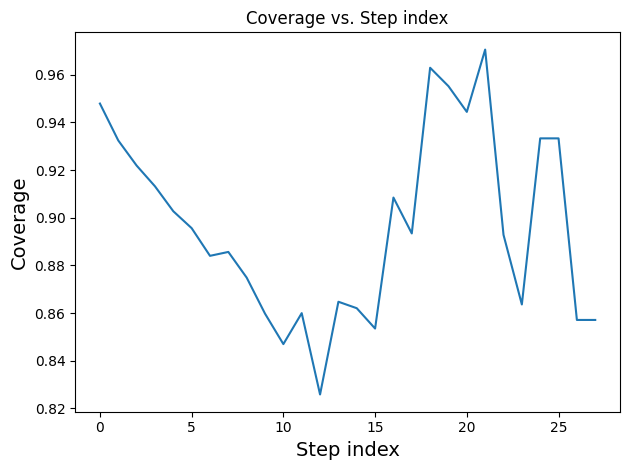

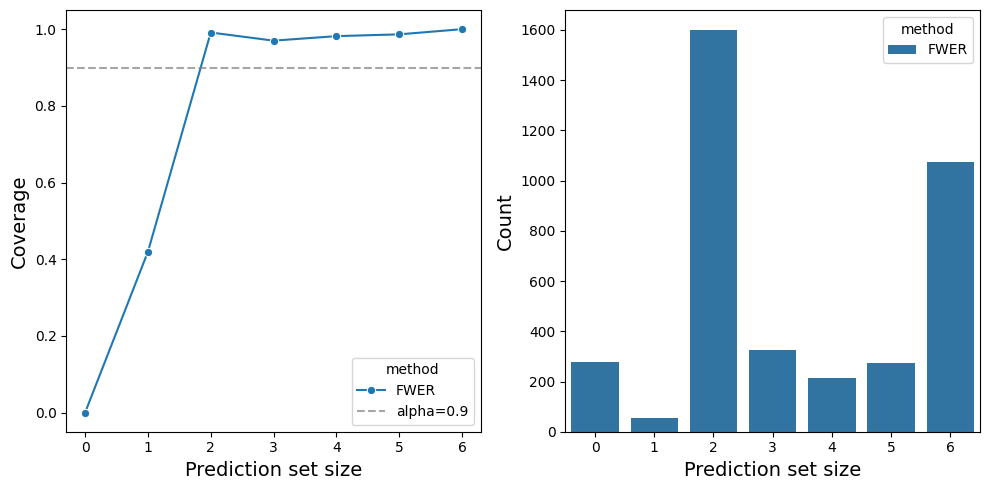

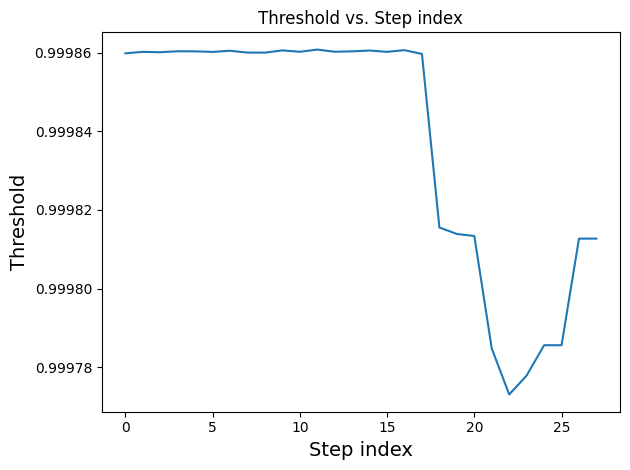

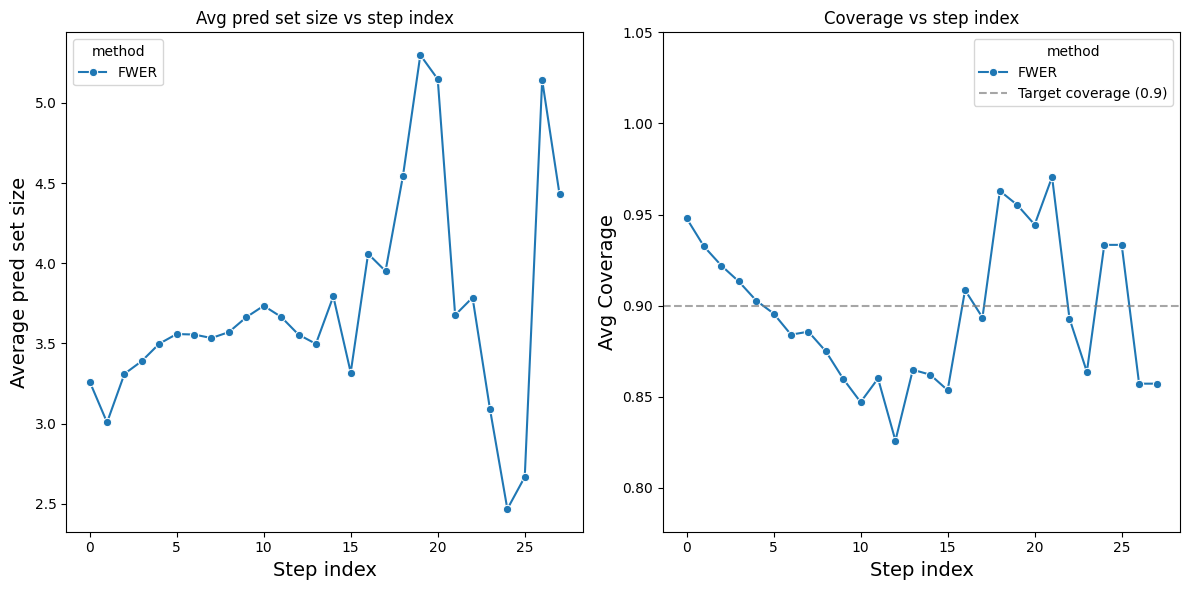

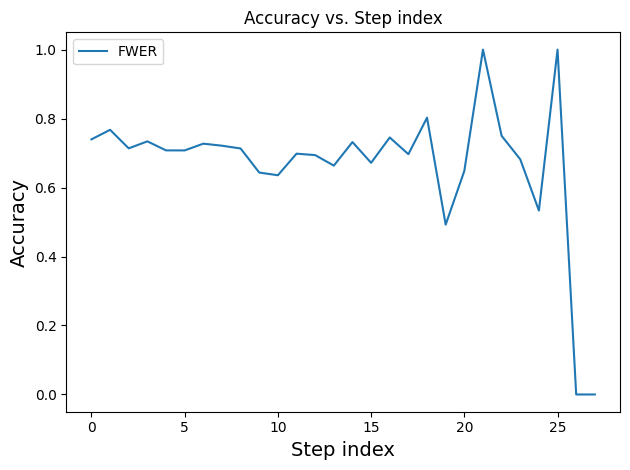

In [103]:
utils.reload('utils.plot_utils')
# results_df[["step_idx", "correct"]].head()
# results_df["step_idx"].isna().mean(), results_df["correct"].isna().mean()
# results_df.groupby("step_idx")["correct"].mean().head()
results_df['covered'] = results_df.apply(lambda row: row['target_label'] in row['pred_set'], axis=1)
results_df['correct'] = results_df.apply(lambda row: row['pred_label'] == row['target_label'], axis=1)

utils.plot.coverage_by_step(results_df)
utils.plot.coverage_vs_set_size(results_df, alpha_line=0.9)
utils.plot.threshold_by_step(results_df)
utils.plot.set_size_vs_task_length(results_df)
utils.plot.accuracy_by_step(results_df, model_col="method")

In [ ]:
def split_to_cal_penalty_stratified(
    df: pd.DataFrame,
    seed: int = 0,
    frac: float = 0.5,
    annotation_field: str = "annotation_id",
    step_col: str = "step_idx",
):
    """
    Split by annotation_id, stratified by max step per annotation, preserving frac.
    """
    df = df.copy()
    if step_col not in df.columns:
        df[step_col] = df.groupby(annotation_field).cumcount()

    ann_max = (
        df.groupby(annotation_field)[step_col]
        .max()
        .reset_index()
        .rename(columns={step_col: "max_step"})
    )

    rng = np.random.RandomState(seed)
    cal_ids, pen_ids = set(), set()

    for max_step, group in ann_max.groupby("max_step"):
        ids = group[annotation_field].tolist()
        rng.shuffle(ids)
        cut = int(len(ids) * frac)
        # keep both splits non-empty if possible
        if 0 < cut < len(ids):
            cal_ids.update(ids[:cut])
            pen_ids.update(ids[cut:])
        else:
            # if only one id in the bucket, assign to cal or pen to preserve overall frac
            (cal_ids if len(cal_ids) / max(1, len(cal_ids)+len(pen_ids)) < frac else pen_ids).update(ids)

    cal_split = df[df[annotation_field].isin(cal_ids)].reset_index(drop=True)
    pen_split = df[df[annotation_field].isin(pen_ids)].reset_index(drop=True)
    return cal_split, pen_split


utils.helpers- reloaded
1 - Completed simulation for risk level: 0.05
Evaluation Results:
lambda(0.05):0.8318, threshold(0.10): 0.9826
Accuracy: 0.8704, accuracy_per_task: 0.8715
Pred set size: avg: 2.1826, median: 1.02, avg_per_task: 2.1504, med_per_task: 1.02
Target in pred set 0.9808, per_task: 0.9827, task_coverage_rate: 0.9082, task_completion_rate 0.5093
FP rate 0.0078, per_task: 0.0092
Ask prob 0.2857, per_task: 0.2757
Pred A: 0.0108, Pred A correct: 0.0632

In [21]:
results_df['pred_set2'] = results_df['choices_probs'].apply(lambda d: [label for label, prob in d.items() if prob > 0.00004285714])
results_df['pred_set_size2'] = results_df['pred_set2'].apply(len)
results_df['is_in_set2'] = results_df.apply(lambda row: row['target_label'] in row['pred_set2'], axis=1)
print(f"{results_df['is_in_set2'].mean(), results_df['pred_set_size2'].mean()}")
print(f"{results_df.groupby('annotation_id')['is_in_set2'].all().mean()}")


(np.float64(0.9984285994892949), np.float64(4.596935769004125))
0.9901234567901235


In [72]:
results_df['min_choice'] = results_df['choices_probs'].apply(lambda d: min(d, key=d.get))
results_df['pred_set2'] = results_df.apply(lambda row: [c for c in row['pred_set'] if c != row['min_choice']], axis=1)
results_df['pred_set_size2'] = results_df['pred_set2'].apply(len)
results_df['is_in_set2'] = results_df.apply(lambda row: row['target_label'] in row['pred_set2'], axis=1)
print(f"{results_df['is_in_set2'].mean(), results_df['pred_set_size2'].mean()}")
print(f"{results_df.groupby('annotation_id')['is_in_set2'].all().mean()}")


(np.float64(0.9789825181693184), np.float64(3.3390296601846394))
0.8790123456790123


tils.helpers- reloaded
1 - Completed simulation for risk level: 0.05
Evaluation Results:
lambda(0.05):0.0, threshold(0.10): 0.9999
Accuracy: 0.7261, accuracy_per_task: 0.7404
Pred set size: avg: 3.6653, median: 2.92, avg_per_task: 3.5407, med_per_task: 2.87
Target in pred set 0.9846, per_task: 0.9813
FP rate 0.2728, per_task: 0.2603
Ask prob 0.9876, per_task: 0.9853
Pred A: 0.3093, Pred A correct: 0.9454

In [52]:
results_df.loc[results_df['correct']==False,'pred_label'].value_counts()
results_df.loc[results_df['correct']==True,'pred_label'].value_counts()
results_df['lambda'].max()

np.float64(9.16916916916917)

In [40]:
results_df.loc[results_df['correct']==False,'pred_label'].value_counts()

pred_label
A    15845
F     8936
E     3096
D     2675
C     2459
B     1613
Name: count, dtype: int64

In [ ]:
a_logits = data_df['choices_logits'].apply(lambda x: np.array(x['A']))
b_logits = data_df['choices_logits'].apply(lambda x: np.array(x['B']))
pred2_logits = data_df['choices_logits'].apply(lambda x: max(v for k, v in x.items() if k != 'A'))



mask = np.where((data_df['pred_label'] == 'A') & (data_df['target_label'] != 'A'))
# mask = np.where((data_df['pred_label'] == 'A'))
# mask = np.where((data_df['target_label'] == 'A') & (data_df['pred_label'] == 'A'))
x = (a_logits - pred2_logits)
(x > 0).mean()
x[mask[0]].median()


np.float64(0.7260828918666251)

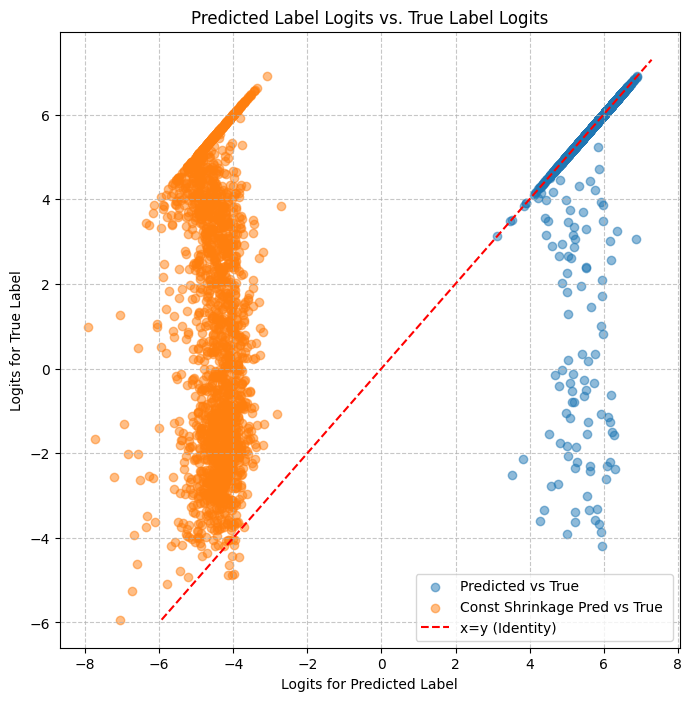

In [130]:
import matplotlib.pyplot as plt
import numpy as np

def apply_shrinkage_logits(logits_dict, func):
        logits = np.array([v for v in logits_dict.values()])
        logits[0] = func(logits[0])
        return dict(zip(logits_dict.keys(), logits))

# Calculate logits for True Label and Predicted Label
# We use -np.inf as a default to handle missing keys safely
logits_true = data_df.apply(lambda row: row['choices_logits'].get(row['target_label'], -np.inf), axis=1)
logits_pred = data_df.apply(lambda row: row['choices_logits'].get(row['pred_label'], -np.inf), axis=1)
const_pred = data_df.apply(lambda row: max(apply_shrinkage_logits(row['choices_logits'], lambda x: x - 125).values()), axis=1)
linear_pred = data_df.apply(lambda row: max(apply_shrinkage_logits(row['choices_logits'], lambda x: x - np.abs(x) ** 1.8).values()), axis=1)

a_mask = data_df['pred_label'] == 'A'

plt.figure(figsize=(8, 8))
plt.scatter(logits_pred[~a_mask], logits_true[~a_mask], 
            alpha=0.5, label='Predicted vs True ', color='tab:blue')

plt.scatter(logits_pred[a_mask] - 10, logits_true[a_mask], 
            alpha=0.5, label='Const Shrinkage Pred vs True ', color='tab:orange')
# plt.scatter(linear_pred[a_mask]/6, logits_true[a_mask]/6, 
#             alpha=0.5, label='Linear Shrinkage Pred vs True ', color='tab:green')

# Add a diagonal line (x=y) for reference
# Calculate min/max ignoring -inf for the plot range
min_val = min(logits_pred.replace(-np.inf, np.nan).min(), logits_true.replace(-np.inf, np.nan).min())
max_val = max(logits_pred.max(), logits_true.max())

# Plot the diagonal line from min to max
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='x=y (Identity)')

plt.xlabel('Logits for Predicted Label')
plt.ylabel('Logits for True Label')
plt.title('Predicted Label Logits vs. True Label Logits')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


a_logits - max_not_a = -1.78
a_logits - max_not_a = 5.37 when the model predicts 'A'
a_logits - max_not_a = 5.00 when the model predicts 'A' and mistaken
a_logits - max_not_a = 7.21 when the model predicts 'A' and correct

utils.helpers- reloaded
Evaluation Results:
lambda(0.05):1.6236, threshold(0.10): 0.9877
Accuracy: 0.8708, accuracy_per_task: 0.873
Pred set size: avg: 2.1594, median: 1.0, avg_per_task: 2.124, med_per_task: 1.0
Target in pred set 0.9808, per_task: 0.9824
FP rate 0.0106, per_task: 0.0094
Ask prob 0.282, per_task: 0.2713
Pred A: 0.017, Pred A correct: 0.1287

In [ ]:


# Example Usage:
# valid_logits = ... (your validation set logits)
# valid_labels = ... (your validation set labels)

results_df['choices_probs'].apply(lambda x: np.array([v for v in x.values()]))

Optimal Temperature: 1.3762


In [109]:
from pathlib import Path
import pandas as pd

def get_results_df(dir="results/simulation"):
    results_dir = Path(dir)  
    files = sorted(results_dir.glob("*.pkl"))

    if not files:
        # raise FileNotFoundError(f"No .pkl files in {results_dir}")
        return None

    dfs = [pd.read_pickle(f) for f in files]
    df_all = pd.concat(dfs, ignore_index=True)
    return df_all

def get_metrics_df(dir="results/metrics"):
    metrics_dir = Path(dir)  
    dfs = [ get_results_df(dir=str(met_dir)) for met_dir in metrics_dir.iterdir()]
    df_all = pd.concat(dfs, ignore_index=True)
    return df_all

# Cols to add
df_all = None
df_all = get_results_df()
df_all['covered'] = df_all.apply(lambda row: row['target_label'] in row['pred_set'], axis=1)

metrics_all = get_metrics_df(dir="results/metrics")
# metrics_all['method'] = metrics_all['method'].fillna('shrinkage_linear')
metrics_df = metrics_all.groupby(['risk_level', 'method']).mean().reset_index()




In [111]:
utils.reload('utils', 'utils.metrics', 'utils.helpers', 'utils.plot_utils')

# risk plots
# utils.plot.quick_plot(metrics_df, y='accuracy')
# Make sure :
# Asking probability 

# Later -maybe
# utils.plot.conditional_risk_by_step(df_all)
# utils.plot.failure_rate_vs_step_length(df_all)
per_episode = df_all.groupby(["method", "annotation_id"])["covered"].all()
rate_by_method = per_episode.groupby(level=0).mean().reset_index(name="episode_coverage")
rate_by_method

utils- reloaded
utils.metrics- reloaded
utils.helpers- reloaded
utils.plot_utils- reloaded


,method,episode_coverage
0,CRC,0.765469
1,KnowNo,0.904000
2,NaiveShift6,0.960741
3,Shrinkage(Ours),0.906148


utils- reloaded
utils.metrics- reloaded
utils.helpers- reloaded
utils.plot_utils- reloaded


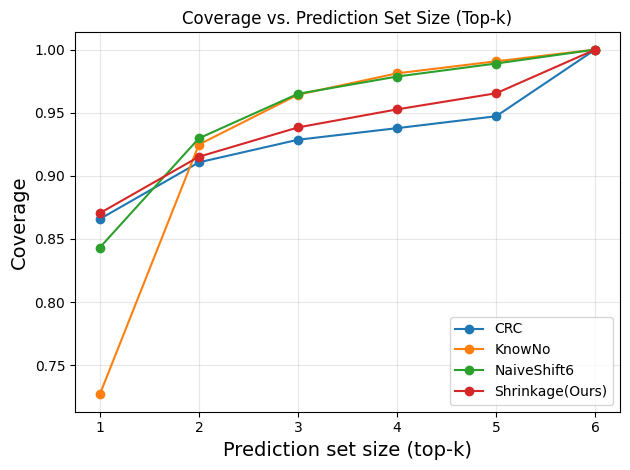

In [112]:
utils.reload('utils', 'utils.metrics', 'utils.helpers', 'utils.plot_utils')
utils.plot.plot_coverage_vs_set_size(df_all)

utils- reloaded
utils.metrics- reloaded
utils.helpers- reloaded
utils.plot_utils- reloaded


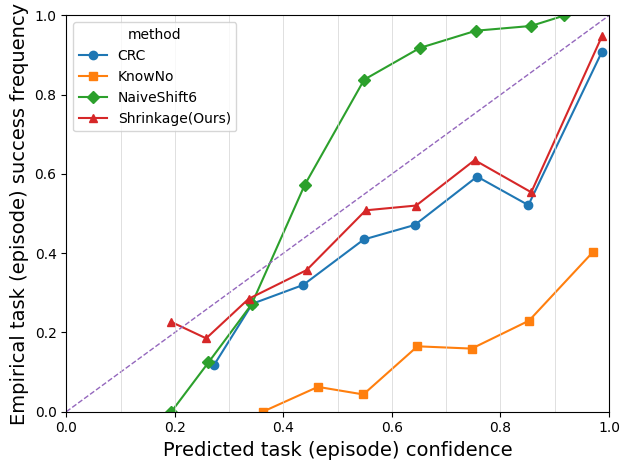

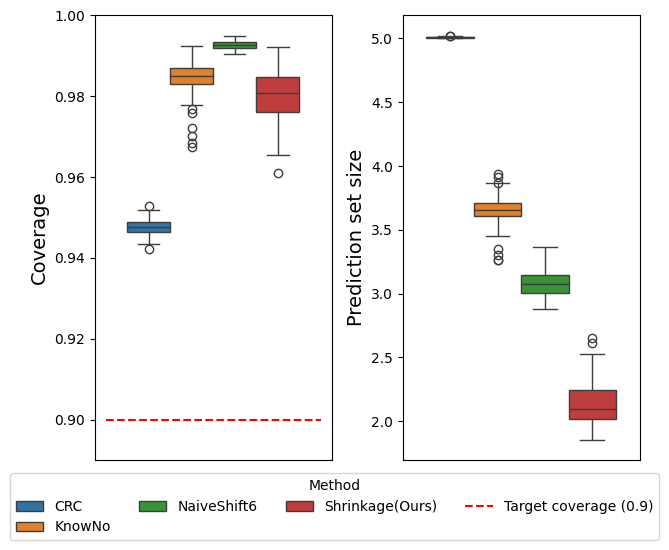

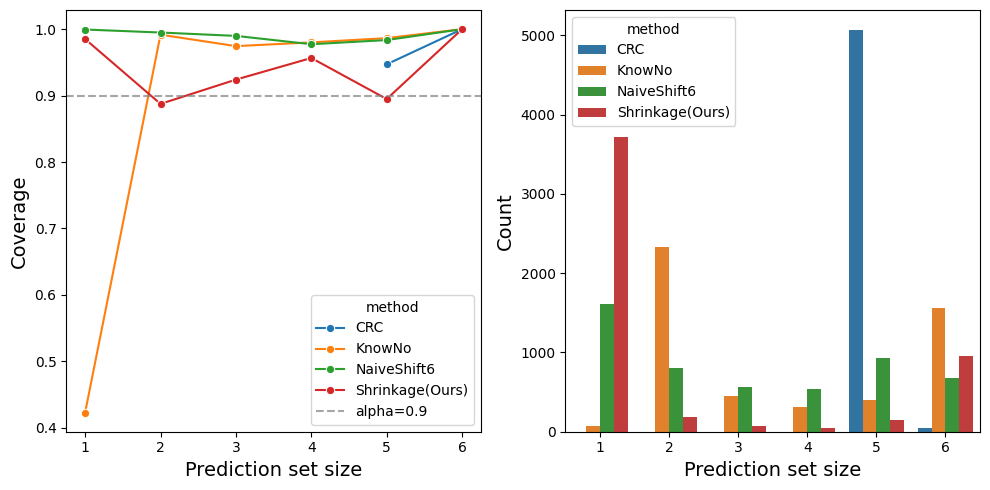

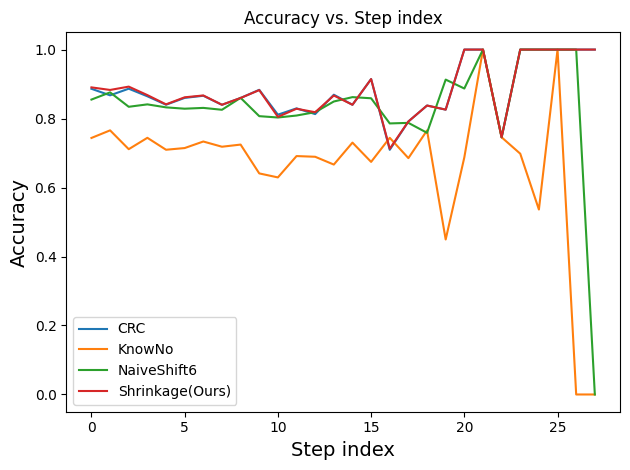

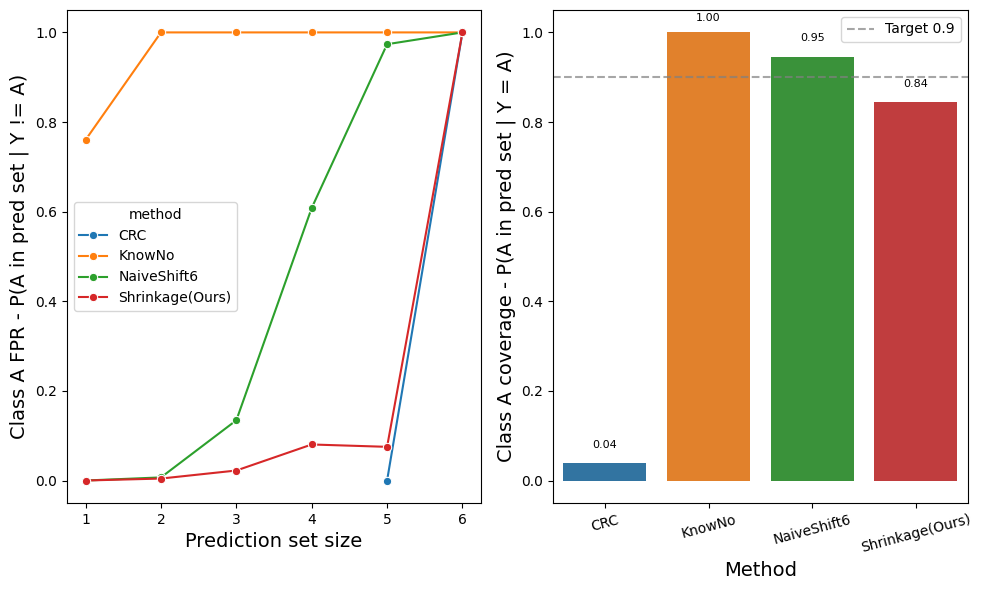

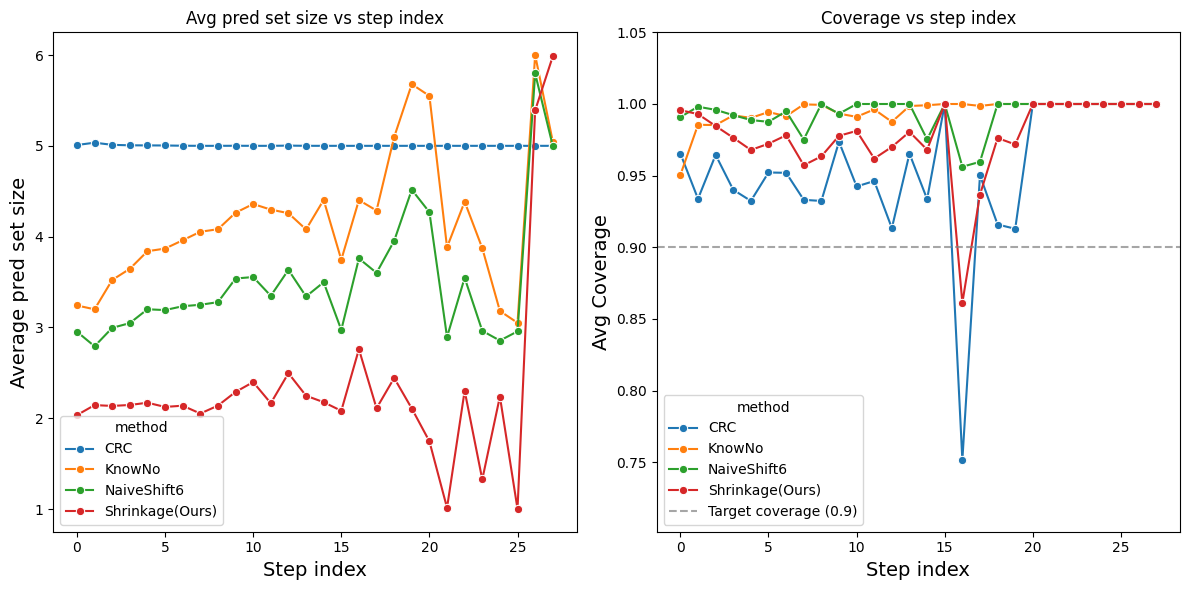

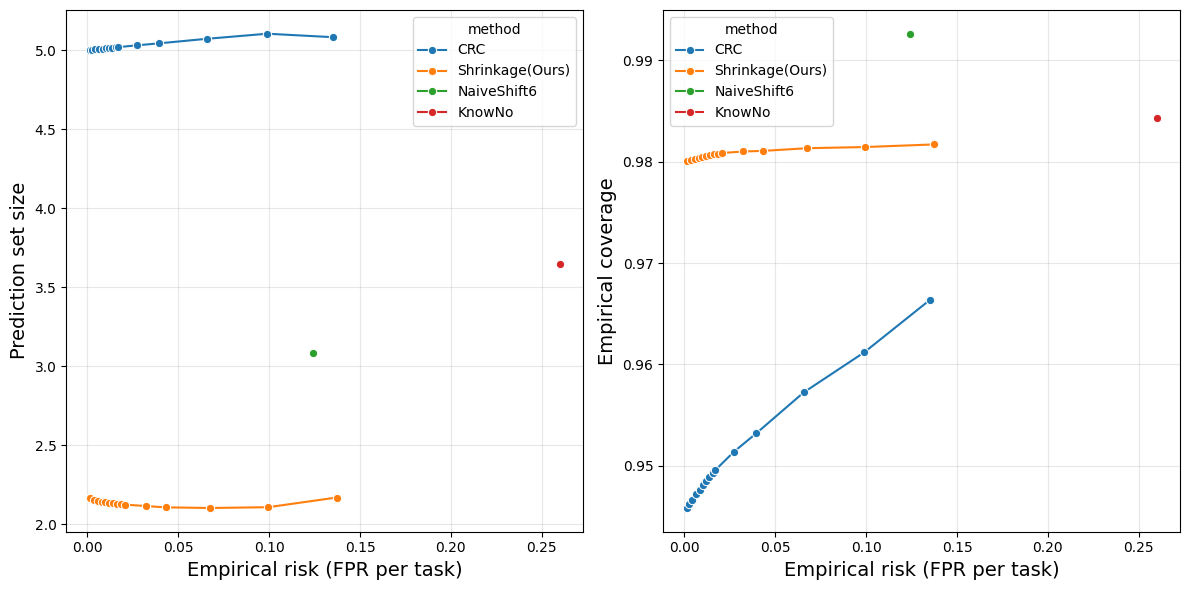

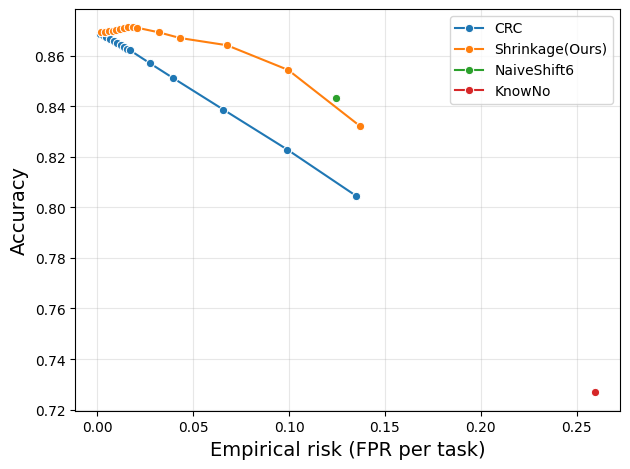

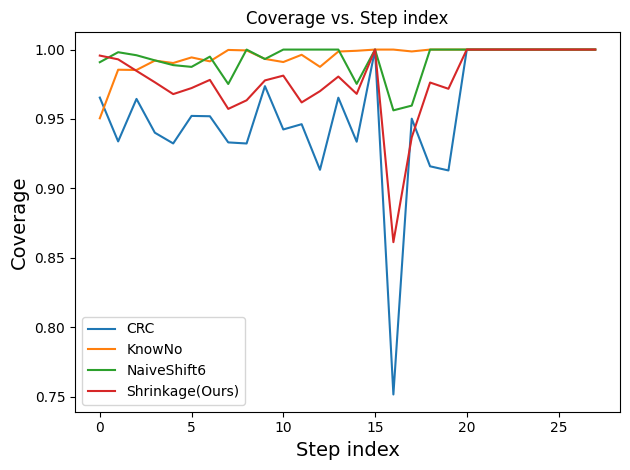

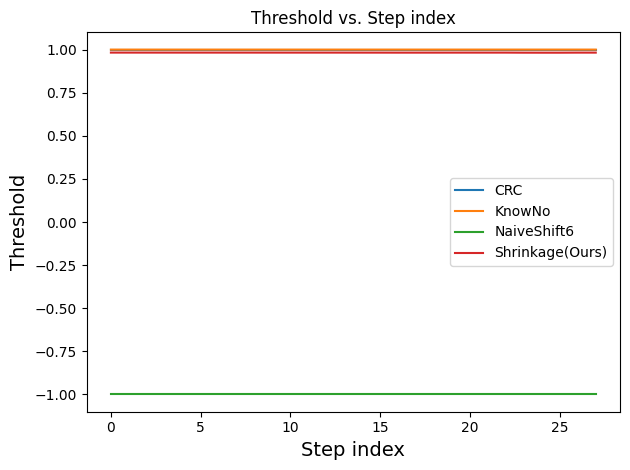

In [94]:
utils.reload('utils', 'utils.metrics', 'utils.helpers', 'utils.plot_utils')


# ORDER OF PLOTTING
# risk - add the calibration were ran with target betweem 0.01 to 0.5.
utils.plot.plot_episode_reliability_multi(
    df=df_all,
    risk_level=0.05,
    threshold_alpha=0.1,
    n_bins=10,
    min_episodes_in_bin=5,
)
# utils.plot.risk_plot(metrics_df)
utils.plot.coverage_boxplot(df_all)
utils.plot.coverage_vs_set_size(df_all, alpha_line=0.9)
utils.plot.accuracy_by_step(df_all, model_col="method")
utils.plot.a_in_pred_set(df_all)
utils.plot.set_size_vs_task_length(df_all, ann_col='annotation_id')
utils.plot.risk_and_fpr_plots(metrics_df)

utils.plot.quick_plot(metrics_df, y='accuracy')
utils.plot.coverage_by_step(df_all,model_col="method")

utils.plot.threshold_by_step(df_all, model_col="method")


# Not good probably ?
# utils.plot.fpr_a_vs_coverage(metrics_df) # add the calibration were ran with target betweem 0.01 to 0.5.

# metrics_df

In [103]:
utils.reload('utils', 'utils.metrics', 'utils.helpers', 'utils.plot_utils')

# utils.plot.a_in_pred_set_bar_plot(df_all)

# utils.plot.reliability_plot(results_df)

# bad
# utils.plot.a_in_pred_set(df_all)

# utils.plot.accuracy_vs_length(results_df);



utils- reloaded
utils.metrics- reloaded
utils.helpers- reloaded
utils.plot_utils- reloaded


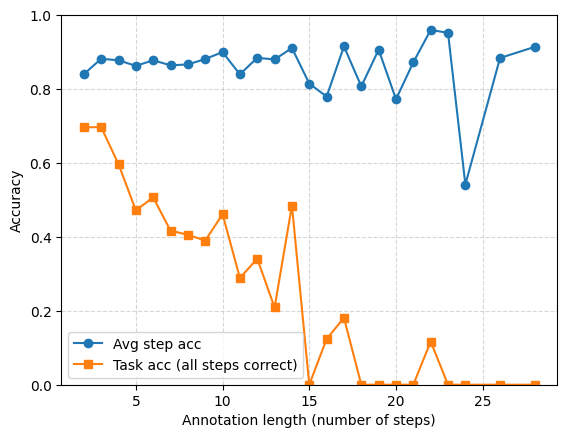

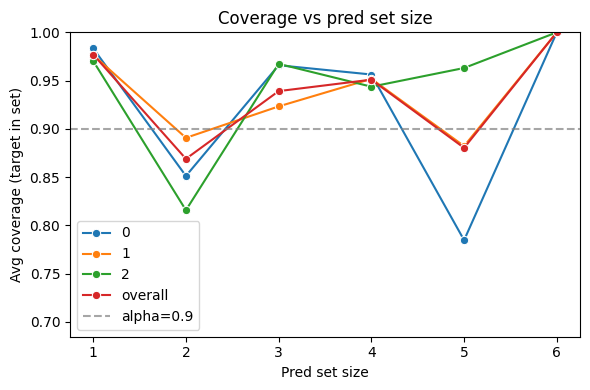

In [ ]:
ds_dict = build_datasets_dict(id2split.values(),cache_dir=CACHE_DIR);

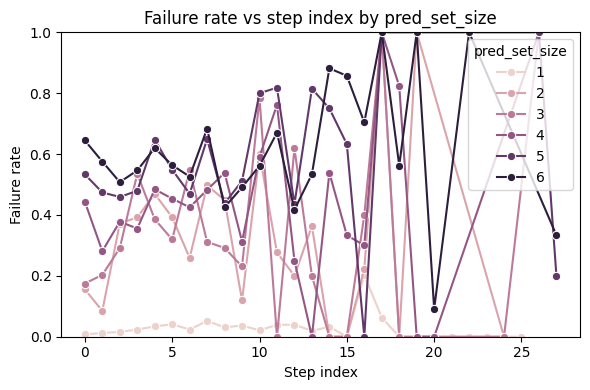

In [ ]:
data_dict = {}
for split, test_split in ds_dict.items():
    data_dict[split] = MultiChoiceDataset(
        ds_dict, tokenizer, num_candidates=num_candidates, max_context_len=max_context_len, cache_prompt=True, cache_tokenized=True
    )
    

In [310]:
df[df['correct'] == False]['target_label'].value_counts()
# results_df[results_df['correct'] == False]['target_label'].value_counts()
df.groupby('annotation_id').apply(lambda x: 'A' == x['target_label']).mean()

/tmp/ipykernel_2023436/2282679156.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('annotation_id').apply(lambda x: 'A' == x['target_label']).mean()


np.float64(0.054190502985401234)

In [270]:
pd.qcut(results_df["target_prob"], q=5, duplicates="drop")

df = results_df.copy()
df["A_in_set"] = df["pred_set"].apply(lambda s: "A" in s)
pd.crosstab(df["A_in_set"], df["pred_set_size"], normalize="index")

pred_set_size,1,2,3,4,5,6
A_in_set,,,,,,
False,0.9225,0.0411,0.0125,0.0083,0.0156,0.0000
True,0.0009,0.0449,0.0188,0.0242,0.0421,0.8691


In [186]:
utils.reload('utils', 'utils.metrics', 'utils.helpers')
print(utils.metrics.compute_mind2web_metrics(test_df))

utils- reloaded
utils.metrics- reloaded
utils.helpers- reloaded
{'Ele. Acc': np.float64(73.47), 'Op. F1': np.float64(71.15), 'Step SR': np.float64(67.9), 'SR': np.float64(15.99)}


In [371]:
# expand the dict column
logits_df = data_df["choices_logits"].apply(pd.Series)

# now you can aggregate/select
# e.g., mean logits for A and B
# logits_df.agg(A_min=("A", "min"), B_min=("B", "min"),)
logits_df.agg(["min", "max", "mean"],axis=0)
# or just get the columns
# AB = logits_df[["A", "B"]]
# (result_df['pred_label'] == 'A').mean()

,A,B,C,D,E,F
min,-3.5733,-7.7101,-6.8813,-7.7855,-8.1641,-7.2283
max,7.2945,6.9088,6.1600,6.8612,6.1592,6.5083
mean,2.3320,2.7315,-3.1096,-3.5462,-3.7845,-2.0554


In [ ]:
answers = pd.read_pickle("oracle_answers.pkl")

annotations = answers.action_uid
test_df = df_all[df_all['action_uid'].isin(annotations)]
cal_df = df_all[~df_all['action_uid'].isin(annotations)]
test_df, pen_df = split_to_cal_penalty(test_df, frac=0.1, seed=0)



In [ ]:

lambda_grid =  np.linspace(0, 10.0, 1000)
best_lambda, results = utils.helpers.best_lambda_from_df(cal_df=pen_df, alpha=risk_level, lambda_grid=lambda_grid, shrinkage_type='constant')
cal_df = apply_shrinkage_to_df(cal_df, shrinkage=best_lambda, temp=1, shrinkage_type='constant')
threshold = get_threshold(cal_df, alpha=thresh_alpha)
result_df = test_df.copy()
result_df['lambda'] = best_lambda
result_df['threshold'] = threshold
result_df = apply_shrinkage_to_df(result_df, shrinkage=best_lambda, threshold=threshold, temp=1, shrinkage_type='constant')
result_df

In [ ]:
# 1. Merge the dataframes on the ID
merged = test_df.merge(result_df, on='annotation_id', suffixes=('_test', '_results'))

# 2. Compare the sets row-wise
# Assuming the columns are named 'pred_set_results' and 'pred_set_test' after merge
x = merged.apply(lambda row: set(row['pred_set_results']).issubset(set(row['pred_set_test'])), axis=1)

merged.loc[x == False, ['annotation_id', 'pred_set_results', 'pred_set_test']]


,annotation_id,pred_set_results,pred_set_test
12,a52fcf7a-50aa-4256-8796-654b3dc3adac_0,"[A, B, C, D, E, F]","[B, C, D, E, F]"
14,a52fcf7a-50aa-4256-8796-654b3dc3adac_0,"[A, B, C, D, E, F]","[B, C, D, E, F]"
31,a52fcf7a-50aa-4256-8796-654b3dc3adac_0,"[A, B, C, D, E, F]","[B, C, D, E, F]"
33,a52fcf7a-50aa-4256-8796-654b3dc3adac_0,"[A, B, C, D, E, F]","[B, C, D, E, F]"
50,a52fcf7a-50aa-4256-8796-654b3dc3adac_0,"[A, B, C, D, E, F]","[B, C, D, E, F]"
...,...,...,...
20701,d10c0099-16f1-4bee-bab4-a2a143ea0fd3_0,"[A, B, C, D, E, F]","[F, A]"
20702,d10c0099-16f1-4bee-bab4-a2a143ea0fd3_0,"[A, B, C, D, E, F]","[F, A]"
20705,d10c0099-16f1-4bee-bab4-a2a143ea0fd3_0,[B],"[F, A]"
20706,d10c0099-16f1-4bee-bab4-a2a143ea0fd3_0,"[A, B, C, D, E, F]","[F, A]"


np.float64(0.17209077740222115)

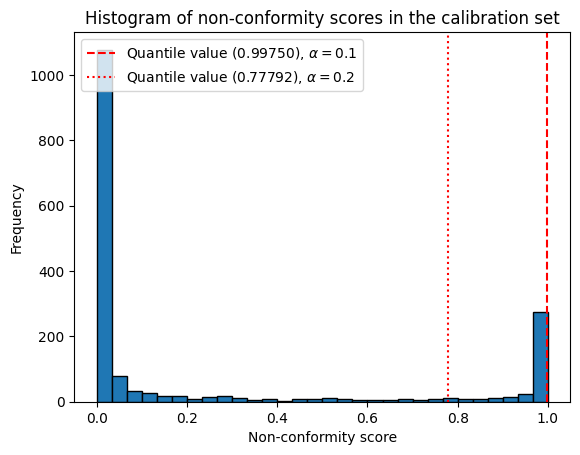

A good predictor should have low non-conformity scores, concentrated at the left side of the figure


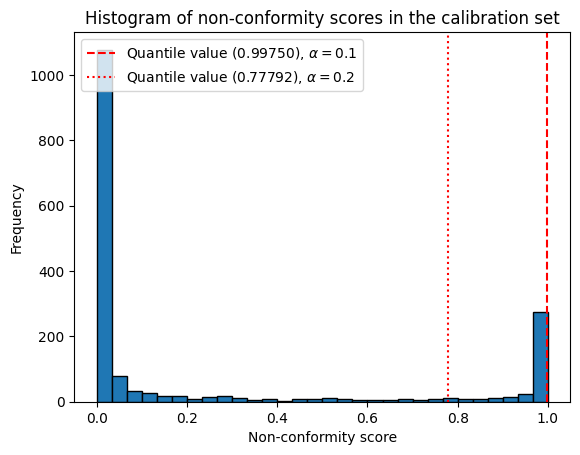

A good predictor should have low non-conformity scores, concentrated at the left side of the figure


In [58]:
def get_threshold(scores, alpha: float):
    N = len(scores)
    k = int(np.ceil((N + 1) * (1 - alpha)))
    sorted_scores = np.sort(scores.values)
    threshold = sorted_scores[k - 1]
    return threshold

# google's nonconformity score
cal_grouped = cal_df.groupby('annotation_id')
score_per_group = 1 - cal_grouped['target_prob'].min()

threshold = get_threshold(score_per_group, alpha=0.1)

naive_threshold = get_threshold(1 - cal_df['target_prob'], alpha=0.1)
naive_threshold2 = get_threshold(1 - cal_df['target_prob'], alpha=0.2)
# threshold2 = get_threshold(score_per_group, alpha=0.2)

# plot histogram of non-conformity scores in the calibration set
utils.plot.nonconformity_histogram(
    1 - cal_df['target_prob'], naive_threshold, None, naive_threshold2, None
)

cal_grouped_test_split = cal_df.groupby('test_split')
# for split_name, group in cal_grouped_test_split:
#     score_per_group = 1 - group.groupby('annotation_id')['true_prob'].min()
#     threshold_ = get_threshold(score_per_group, alpha=0.1)
#     naive_threshold = get_threshold(1 - group['true_prob'], alpha=0.1)
#     print(f"Split (𝛼=0.1): {id2split[split_name]} - Threshold: {threshold_:.4f}, Naive Threshold: {naive_threshold:.4f}")

cal_grouped = cal_df.groupby('annotation_id')
score_per_group = 1 - cal_grouped['target_prob'].min()
threshold = get_threshold(score_per_group, alpha=0.1)

utils.plot.nonconformity_histogram(
    1 - cal_df['target_prob'], naive_threshold, None, naive_threshold2, None
)

In [ ]:
cal_df = pd.read_pickle("cal_df.pkl")
cal_df = utils.helpers.add_eval_columns(cal_df)
# cal_df = utils.helpers.add_eval_columns(cal_df, logits_temp=6.0)
# test_df = utils.helpers.add_eval_columns(test_df)

KeyError: 'choices_logits'

In [18]:
cal_df['choices_probs'] = utils.helpers.softmax_with_temperature_from_probs(cal_df['choices_probs'], temperature=6.0)
cal_df['true_prob'] = cal_df.apply(lambda row: row['choices_probs'][row['label']] if row['label'] in row['choices_probs'] else 0, axis=1)

TypeError: argument of type 'float' is not iterable

In [ ]:
cal_df = utils.helpers.add_eval_columns(cal_df, log_probs_col='choices_log_probs')
cal_grouped = cal_df.groupby('annotation_id')
score_per_group = 1 - cal_grouped['true_prob'].min()

threshold = get_threshold(score_per_group, alpha=0.1)

# naive_threshold = get_threshold(1 - cal_df['true_prob'], alpha=0.1)
# naive_threshold2 = get_threshold(1 - cal_df['true_prob'], alpha=0.2)
threshold2 = get_threshold(score_per_group, alpha=0.2)

# plot histogram of non-conformity scores in the calibration set
utils.plot.nonconformity_histogram(
    score_per_group, threshold, None, threshold2, None
)


In [51]:
# Model is probably biased towards A when not certain
print(cal_df[cal_df['correct'] == False]['pred_label'].value_counts())
# utils.plot.accuracy_vs_length(cal_df);

pred_label
A    162
D      5
B      2
F      1
E      1
Name: count, dtype: int64


In [15]:
len(test_df[test_df['pred_set_size'] > 1]) / len(test_df)

0.9993102259010174

In [ ]:
test_df[test_df['pred_set_size']>1].iloc[1]

relative_idx                                                     1
annotation_id                 91695df8-f256-47c9-8c37-06e8d0fc758f
action_uid                    ea2865e4-2858-478c-bf83-93d576cad774
pred_label                                                       B
pred_action                                                  CLICK
pred_value                                                    None
label                                                            B
label_text                                       B.\nAction: CLICK
choices_probs    {'A': 0.0009128428064286709, 'B': 0.9990413784...
prob                                                      0.999041
test_split                                                       0
labels_tokens                                  B.\nAction: CLICK\n
correct                                                       True
pred_set                                                    [A, B]
pred_set_size                                                 

In [4]:
import pandas as pd
oracle_answers = pd.read_pickle('oracle_answers.pkl')
oracle_answers.head()

,idx,relative_idx,test_split,annotation_id,action_uid,oracle_answer
0,0,0,0,91695df8-f256-47c9-8c37-06e8d0fc758f,73e0e7ed-d784-4b7a-a06c-48324e44ce7b,Click the 'Reservations' button located at the...
1,1,1,0,91695df8-f256-47c9-8c37-06e8d0fc758f,ea2865e4-2858-478c-bf83-93d576cad774,"Click the ""Budget Truck"" link located at the t..."
2,2,2,0,91695df8-f256-47c9-8c37-06e8d0fc758f,c70a5d9b-8777-4ff7-a17d-1f76012e14ba,Type '08817' into the input field labeled 'Whe...
3,3,3,0,91695df8-f256-47c9-8c37-06e8d0fc758f,3e671043-cab2-4e44-a1ce-3ed9de91d16b,"Type ""04/12/2024"" into the input field labeled..."
4,4,4,0,91695df8-f256-47c9-8c37-06e8d0fc758f,60888ab2-b605-4886-8dac-6ba72b6cde0a,"Click the date ""12"" in the April 2023 calendar..."


[]

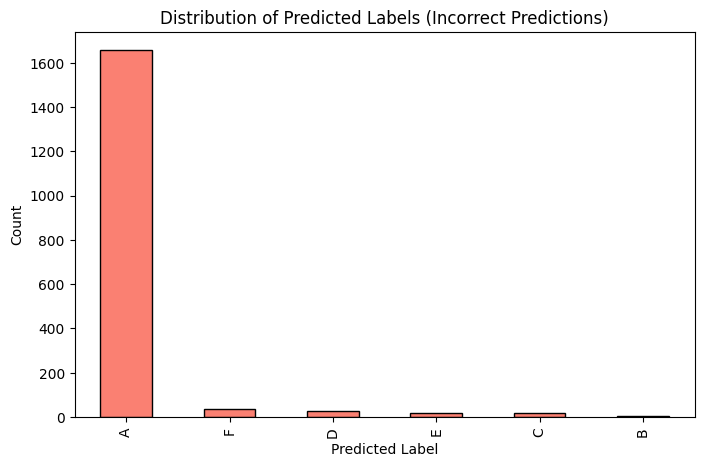

In [37]:
import matplotlib.pyplot as plt
# Filter for incorrect predictions and count values
df_all = pd.concat([cal_df, test_df], ignore_index=True)
incorrect_counts = df_all[df_all['correct'] == False]['pred_label'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 5))
incorrect_counts.plot(kind='bar', color='salmon', edgecolor='black')

plt.title('Distribution of Predicted Labels (Incorrect Predictions)')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.plot()

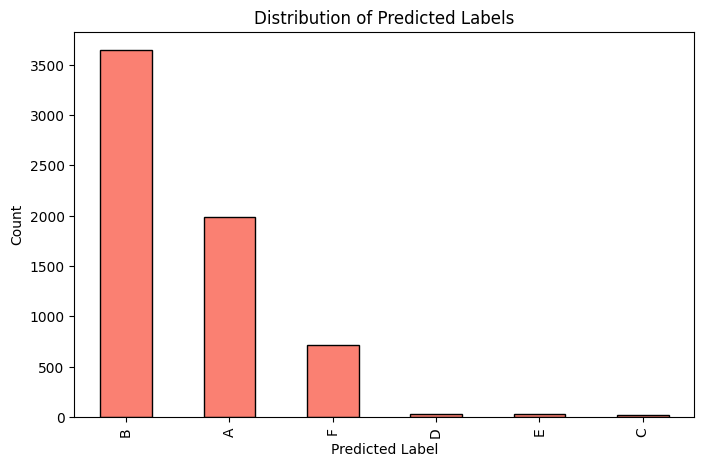

In [38]:
import matplotlib.pyplot as plt
# Filter for incorrect predictions and count values

incorrect_counts = df_all['pred_label'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 5))
incorrect_counts.plot(kind='bar', color='salmon', edgecolor='black')

plt.title('Distribution of Predicted Labels')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.show()

In [9]:
test_df['correct'] = test_df['pred_label'] == test_df['label']
test_df['pred_set'] = test_df['choices_probs'].apply(lambda row: [ label for label, prob in row.items() if 1 - prob <= threshold])
test_df['pred_set_size'] = test_df['pred_set'].apply(len)
# test_task_group = test_df.groupby('annotation_id')

In [11]:
import utils.metrics
def print_evaluation(df):
    for idx_split, split_name in idx_split_map.items():
        print(f"Metrics for split: {split_name}")
        print(utils.metrics.compute_mind2web_metrics(df, split_value=idx_split))
    print(f"Metrics for overall dataset:")
    print(utils.metrics.compute_mind2web_metrics(df))

df_all = pd.concat([cal_df, test_df], ignore_index=True)
print_evaluation(df_all)

Metrics for split: test_task
{'Ele. Acc': np.float64(82.46), 'Op. F1': np.float64(79.57), 'Step SR': np.float64(76.16), 'SR': np.float64(22.6)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(72.82), 'Op. F1': np.float64(70.27), 'Step SR': np.float64(67.07), 'SR': np.float64(16.57)}
Metrics for split: test_website
{'Ele. Acc': np.float64(69.5), 'Op. F1': np.float64(67.01), 'Step SR': np.float64(62.39), 'SR': np.float64(8.45)}
Metrics for overall dataset:
{'Ele. Acc': np.float64(74.04), 'Op. F1': np.float64(71.44), 'Step SR': np.float64(68.0), 'SR': np.float64(16.49)}


In [12]:
df_orig_all = pd.concat([cal_df, df_orig], ignore_index=True)
print_evaluation(df_orig_all)

Metrics for split: test_task
{'Ele. Acc': np.float64(81.86), 'Op. F1': np.float64(78.81), 'Step SR': np.float64(75.32), 'SR': np.float64(22.6)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(71.41), 'Op. F1': np.float64(68.98), 'Step SR': np.float64(65.84), 'SR': np.float64(17.72)}
Metrics for split: test_website
{'Ele. Acc': np.float64(66.46), 'Op. F1': np.float64(63.99), 'Step SR': np.float64(59.23), 'SR': np.float64(7.75)}
Metrics for overall dataset:
{'Ele. Acc': np.float64(72.55), 'Op. F1': np.float64(70.0), 'Step SR': np.float64(66.57), 'SR': np.float64(17.18)}


In [13]:
df_orig_all = pd.concat([cal_df, df_shift], ignore_index=True)
print_evaluation(df_orig_all)

Metrics for split: test_task
{'Ele. Acc': np.float64(81.58), 'Op. F1': np.float64(78.55), 'Step SR': np.float64(75.18), 'SR': np.float64(22.6)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(71.47), 'Op. F1': np.float64(69.05), 'Step SR': np.float64(65.89), 'SR': np.float64(17.87)}
Metrics for split: test_website
{'Ele. Acc': np.float64(66.56), 'Op. F1': np.float64(64.08), 'Step SR': np.float64(59.26), 'SR': np.float64(7.75)}
Metrics for overall dataset:
{'Ele. Acc': np.float64(72.55), 'Op. F1': np.float64(70.01), 'Step SR': np.float64(66.59), 'SR': np.float64(17.28)}


In [11]:
# print("Evaluation on Test Set")
# print(f"Avg task accuracy: {test_df['correct'].mean():.4f}")
# print(f"Avg annotation accuracy: {test_task_group['correct'].min().mean():.4f}")
# utils.plot.accuracy_vs_length(test_df);


In [14]:
import gc
try:
    # Not enough memory for 2 models so we need to free GPU memory
    for d in set(model.hf_device_map.values()):
        if isinstance(d, int):
            torch.cuda.set_device(d)
            torch.cuda.empty_cache()
    del model
    gc.collect()         
    torch.cuda.empty_cache()       
    torch.cuda.ipc_collect()
except NameError:
    pass

try:
    # Not enough memory for 2 models so we need to free GPU memory
    for d in set(model.hf_device_map.values()):
        if isinstance(d, int):
            torch.cuda.set_device(d)
            torch.cuda.empty_cache()
    del oracle
    gc.collect()         
    torch.cuda.empty_cache()       
    torch.cuda.ipc_collect()
except NameError:
    pass

In [77]:
import gc
del oracle
gc.collect()         
torch.cuda.empty_cache()       
torch.cuda.ipc_collect()

In [172]:
from tqdm.auto import tqdm
def ask_oracle(df:pd.DataFrame):
    answers = []
    # iterrows is SLOW! should replace
    for i, target in tqdm(df.iterrows(), desc="Asking oracle..."):
        test_set = test_dict[idx_split_map[target['test_split']]]

        html_context, seq_in, seq_out, prev_actions, choices_str = test_set.prompt_view[target['relative_idx']]
        task = test_set.data[target['relative_idx']]['confirmed_task']
        screenshot = test_set.data[target['relative_idx']]['screenshot']
        
        answer=oracle.ask(task=task,
                prev_actions=prev_actions,
                html_context=html_context,
                choices=choices_str,
                candidates=target['pred_set'],
                image=screenshot)
        log_response(target["annotation_id"], target["action_uid"], answer)
        answers.append([i,target['relative_idx'], target['test_split'], target["annotation_id"],target["action_uid"], answer])
    answers_df = pd.DataFrame(answers, columns=['idx','relative_idx','test_split','annotation_id','action_uid','oracle_answer'])
    return answers_df

# answer_df = ask_oracle(test_df[test_df['pred_set_size'] > 1])
# answer_df.to_pickle("oracle_answers.pkl")


In [173]:
import gc
torch.cuda.empty_cache()
gc.collect()

2790

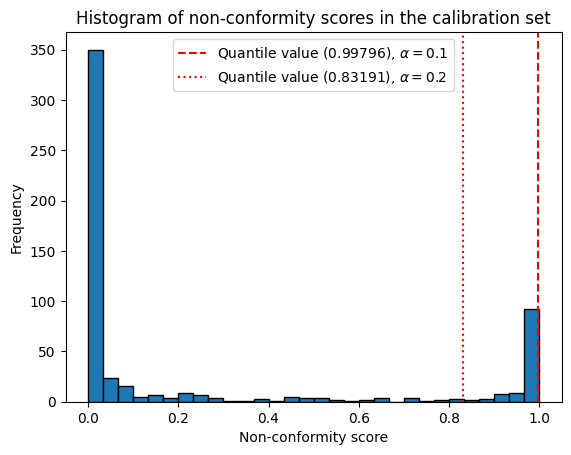

A good predictor should have low non-conformity scores, concentrated at the left side of the figure


In [42]:
utils.plot.nonconformity_histogram(
    1 - cal_df['target_prob'], naive_threshold, None, naive_threshold2, None
)

In [189]:
utils.reload('utils.prompts')
utils.reload('utils.llm_utils')

answer_df = pd.read_pickle("oracle_answers.pkl")  
re_eval_df = utils.llm.re_evaluate_with_oracle(test_dict, test_df[test_df['pred_set_size'] > 1], answer_df, model, tokenizer)
# re_eval_df = utils.llm.re_evaluate_with_oracle_batch(test_dict, test_df[test_df['pred_set_size'] > 1], answer_df, model, tokenizer, batch_size=2)
# re_eval_df.to_pickle("re_eval_results_23.pkl")
# re_eval_df.head()
# re_eval_results:
# 1 - $task $help together + choices elimination remapped
# 2 - $task $help seperated + choices elimination NOT remapped
# 3 - $task $help seperated + choices elimination remapped
# 4 - $task $help seperated + choices NO elimination NOT remapped
# 5 - (21) replacing $task with help
# 6 - (2_1) $task $help seperated + choices elimination NOT remapped (no html)
# 22 - $task $help seperated BUT help right after task + choices elimination NOT remapped 
# 23 - same as 22 but we remap choices


utils.prompts- reloaded
utils.llm_utils- reloaded


Re-evaluating with oracle...:   0%|          | 0/5646 [00:00<?, ?it/s]

<html> <body> <iframe fb:page facebook social plugin f22569b367eaa4> <div feed> <div> <div> <div id=0> Ticket Center </div> <a id=1> <span> about 6 years ago </span> </a> </div> <div id=2> <p id=3> Jeff Dunham is making everyone laugh with those puppets of his. Haven't seen him live yet? No worries... grab your </p> <a> http://www.ticketcenter.com//perfectly-unbalanced-jeff-du/ </a> </div> </div> </div> </iframe> <tr> <td> 22 </td> <td> 23 </td> <td id=4> 24 </td> <td> 25 </td> <td> 26 </td> <td> 27 </td> </tr> </body> </html>
Based on the HTML webpage above, try to complete the following task:
Task: Browse the venues that are playing the Wicked show from Oct 5 to Oct 24 2023
Guidence: Click the date cell labeled "24" in the calendar grid, which is located in the row with dates 22
Previous actions:
[textbox]  Search for artists, teams or venues... -> TYPE: Wicked
[option]  Wicked -> CLICK
[button]  All dates -> CLICK
[textbox]  Select Date Range -> CLICK
[columnheader]   -> CLICK
[col

In [149]:
# print(re_eval_df['choices_probs'][0])
x = pd.read_pickle("re_eval_results2.pkl")
# print(x['choices_probs'][0])
target = pd.read_pickle("re_eval_results_22.pkl")

target['correct'] = target['pred_label'] == target['label']
x['correct'] = x['pred_label'] == x['label']
target[(target['correct'] == False)&(x['correct'] == True)]

,relative_idx,annotation_id,action_uid,pred_label,pred_action,pred_value,label,label_text,choices_probs,prob,test_split,text_output,correct
30,30,9223f1b4-43ad-4636-9541-99ff9e6ad918,c21aa18b-a3e6-44f9-a068-9169f5483c81,A,None,None,F,F.\nAction: CLICK,"{'A': 0.7952436208724976, 'B': 0.0003522790793...",0.795244,0,A.,False
117,118,4b8fb0aa-7d7c-4a22-bfd5-f09316a050c3,660ffac3-80b3-47f2-ad88-9d1cd15878ec,F,CLICK,None,B,B.\nAction: CLICK,"{'A': 0.2755173146724701, 'B': 0.0211880579590...",0.700594,0,F. Action: CLICK,False
215,218,b674adf9-8950-4d27-b888-b789ccd49479,2b586b17-3cf1-4f01-9798-b597215a5598,A,None,None,B,B.\nAction: CLICK,"{'A': 0.5991392135620117, 'B': 0.3982783555984...",0.599139,0,A.,False
389,394,f9c80513-c1c2-42ef-b768-9a6d0bb5a9a5,817e114d-d315-4508-a57b-4b006463c3c4,A,None,None,B,B.\nAction: CLICK,"{'A': 0.555938184261322, 'B': 0.44406184554100...",0.555938,0,A.,False
537,546,e56ef366-a861-4d96-a1ad-8891d11a0950,ef210961-543a-41b8-ae8f-f07bf22a003e,A,None,None,B,B.\nAction: CLICK,"{'A': 0.6083258390426636, 'B': 0.3916741311550...",0.608326,0,A.,False
554,564,615b59c3-4bef-4d46-8df6-7224b22bd27c,6bcb3cae-6a2a-4eea-a1fd-430681a69a1a,A,None,None,F,F.\nAction: CLICK,"{'A': 0.6462556719779968, 'C': 0.0003972092235...",0.646256,0,A.,False
574,584,e617d6c6-28ee-46cf-965e-ee1448910ce8,88faa170-a068-4638-ab2f-bdf77b1da017,A,None,None,B,B.\nAction: CLICK,"{'A': 0.6038386225700378, 'B': 0.3935435116291...",0.603839,0,A.,False
618,632,a3f650df-02e8-409a-987c-3acddf0ad1f5,fea65442-e1a5-42ca-b204-4a6722123153,A,None,None,B,B.\nAction: CLICK,"{'A': 0.6726649403572083, 'B': 0.3273350894451...",0.672665,0,A.,False
744,760,610fe8c0-6598-4bd5-9864-8e41378db276,53780663-23c5-4f28-9187-0de5a4ff6156,A,None,None,B,B.\nAction: TYPE\nValue: Toyota Corolla,"{'A': 0.740839421749115, 'B': 0.25916051864624...",0.740839,0,A.,False
1202,21,f2cfae2c-fef2-423f-8b5e-eca6b4ec4c40,e4cd8c67-27f4-4632-94ed-781fdbc94750,A,None,None,B,B.\nAction: CLICK,"{'A': 0.5531144142150879, 'B': 0.4458695054054...",0.553114,1,A.,False


In [14]:
print_evaluation(test_df[test_df['pred_set_size'] > 1])
print("----"*5)
print_evaluation(test_df[test_df['pred_set_size'] == 1])


Metrics for split: test_task
{'Ele. Acc': np.float64(82.94), 'Op. F1': np.float64(80.39), 'Step SR': np.float64(76.99), 'SR': np.float64(24.38)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(73.78), 'Op. F1': np.float64(71.23), 'Step SR': np.float64(68.08), 'SR': np.float64(18.88)}
Metrics for split: test_website
{'Ele. Acc': np.float64(70.29), 'Op. F1': np.float64(67.83), 'Step SR': np.float64(63.28), 'SR': np.float64(10.16)}
Metrics for overall dataset:
{'Ele. Acc': np.float64(74.9), 'Op. F1': np.float64(72.36), 'Step SR': np.float64(68.97), 'SR': np.float64(18.62)}
--------------------
Metrics for split: test_task
{'Ele. Acc': np.float64(55.56), 'Op. F1': np.float64(50.82), 'Step SR': np.float64(46.3), 'SR': np.float64(44.44)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(46.94), 'Op. F1': np.float64(46.94), 'Step SR': np.float64(46.94), 'SR': np.float64(45.92)}
Metrics for split: test_website
{'Ele. Acc': np.float64(50.0), 'Op. F1': np.float64(50.0), 'Step SR': np

0       {'A': 0.02635188214480877, 'B': 0.973309397697...
1       {'A': 0.0030708236154168844, 'B': 0.9969292283...
2       {'A': 0.009036794304847717, 'B': 0.99096328020...
3       {'A': 0.017959782853722572, 'B': 0.98204022645...
4       {'A': 0.005839147605001926, 'B': 0.99409133195...
                              ...                        
5641    {'A': 0.029781188815832138, 'F': 0.9702188372612}
5642    {'A': 0.0051618702709674835, 'B': 0.9948380589...
5643    {'A': 0.018530014902353287, 'B': 0.98146992921...
5644    {'A': 0.9993777275085449, 'B': 0.0002468221646...
5645    {'A': 0.8898308277130127, 'B': 0.1011474952101...
Name: choices_probs, Length: 5646, dtype: object

----------
Metrics for split: test_task
{'Ele. Acc': np.float64(71.68), 'Op. F1': np.float64(78.55), 'Step SR': np.float64(66.01), 'SR': np.float64(18.75)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(64.48), 'Op. F1': np.float64(68.91), 'Step SR': np.float64(59.38), 'SR': np.float64(13.44)}
Metrics for split: test_website
{'Ele. Acc': np.float64(55.48), 'Op. F1': np.float64(63.94), 'Step SR': np.float64(49.39), 'SR': np.float64(4.69)}
Metrics for overall dataset:
{'Ele. Acc': np.float64(64.48), 'Op. F1': np.float64(69.9), 'Step SR': np.float64(59.14), 'SR': np.float64(13.14)}
----------
Metrics for split: test_task
{'Ele. Acc': np.float64(81.62), 'Op. F1': np.float64(78.84), 'Step SR': np.float64(75.37), 'SR': np.float64(23.12)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(71.19), 'Op. F1': np.float64(68.84), 'Step SR': np.float64(65.83), 'SR': np.float64(17.44)}
Metrics for split: test_website
{'Ele. Acc': np.float64(66.24), 'Op. F1': np.float64(63.84), 'Step SR':

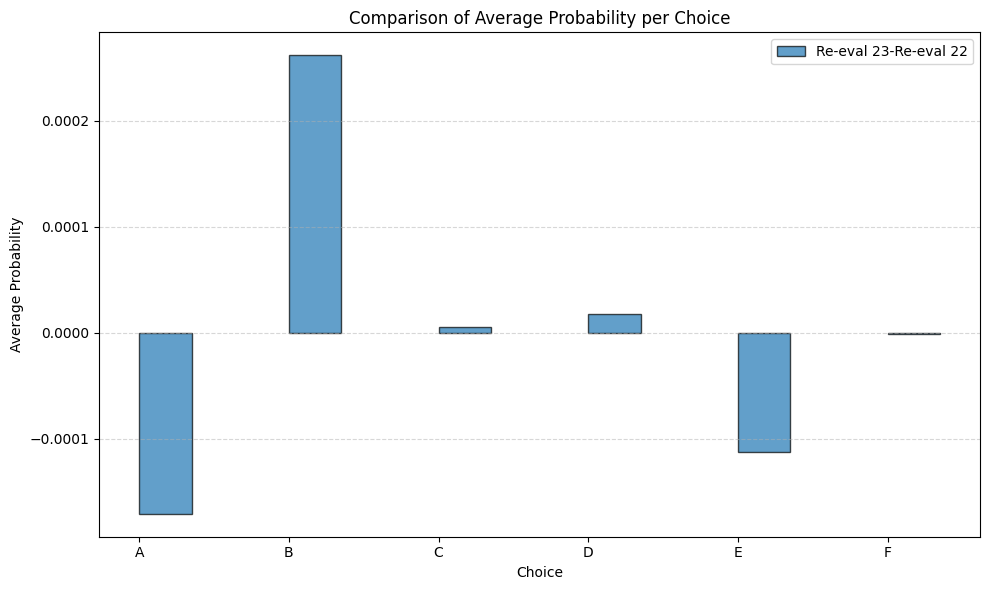

In [133]:
import matplotlib.pyplot as plt
print('-'*10)
x = pd.read_pickle("re_eval_results_23.pkl")
print_evaluation(x)
print('-'*10)
y = pd.read_pickle("re_eval_results_22.pkl")
print_evaluation(y)
print('-'*10)

def plot_avg_prob_comparison(df1, df2, label1='DF1', label2='DF2'):
    """
    Plots a side-by-side histogram of the average probability per choice 
    for two dataframes containing a 'choices_probs' column (dict).
    """
    # Convert list of dicts to DataFrame and calculate mean per column (A, B, C...)
    vals1 = pd.DataFrame(df1['choices_probs'].tolist()).fillna(0)
    vals2 = pd.DataFrame(df2['choices_probs'].tolist()).fillna(0)

    # Convert list of dicts to DataFrame and calculate mean per column (A, B, C...)
    mean1 = vals1.mean()
    mean2 = vals2.mean()
    diff = (vals1 - vals2).mean()
    # Ensure we have the same keys in sorted order
    all_keys = sorted(list(set(mean1.index) | set(mean2.index)))
    mean1 = mean1.reindex(all_keys, fill_value=0)
    mean2 = mean2.reindex(all_keys, fill_value=0)
    
    # Setup plot
    x = np.arange(len(all_keys))
    width = 0.35  # width of the bars
    
    fig, ax = plt.subplots(figsize=(10, 6))
    # rects1 = ax.bar(x - width/2, mean1, width, label=label1, alpha=0.7, edgecolor='black')
    # rects2 = ax.bar(x + width/2, mean2, width, label=label2, alpha=0.7, edgecolor='black')
    rects3 = ax.bar(x + width/2, diff, width, label=f"{label1}-{label2}", alpha=0.7, edgecolor='black')
    
    # Labels and styling
    ax.set_ylabel('Average Probability')
    ax.set_xlabel('Choice')
    ax.set_title('Comparison of Average Probability per Choice')
    ax.set_xticks(x)
    ax.set_xticklabels(all_keys)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

plot_avg_prob_comparison(x, y, label1='Re-eval 23', label2='Re-eval 22')



In [134]:
import seaborn as sns
from functools import partial

# Convert list of dicts to DataFrame and calculate mean per column (A, B, C...)
vals1 = pd.DataFrame(x['choices_probs'].tolist()).fillna(0)
vals2 = pd.DataFrame(y['choices_probs'].tolist()).fillna(0)

# Convert list of dicts to DataFrame and calculate mean per column (A, B, C...)
mean1 = vals1.mean()
mean2 = vals2.mean()
diff = (vals1 - vals2)
def plot_prob_diff_scatter(df1, df2, label_col='label'):
    """
    Plots a scatter plot of the difference in probability assigned to the TRUE label 
    (df1 - df2) for each row, colored by the label.
    """
    # 1. Extract the probability of the TRUE label for each row in both DFs
    #    We use .get(row[label_col], 0) to handle cases where the label might not be in the dict
    prob1 = df1.apply(lambda row: row['choices_probs'].get(row[label_col], 0), axis=1)
    prob2 = df2.apply(lambda row: row['choices_probs'].get(row[label_col], 0), axis=1)
    
    # 2. Calculate the difference
    diffs = prob1 - prob2
    
    # 3. Create a temporary DataFrame for plotting
    plot_data = pd.DataFrame({
        'Index': range(len(diffs)),
        'Probability Difference (DF1 - DF2)': diffs,
        'Label': df1[label_col]
    })
    
    # 4. Plot
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        data=plot_data, 
        x='Index', 
        y='Probability Difference (DF1 - DF2)', 
        hue='Label', 
        palette='tab10',
        alpha=0.7
    )
    
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.title(f'Difference in True Label Probability per Row (DF1 - DF2)')
    plt.ylabel('Prob Diff (Positive = DF1 is better)')
    plt.xlabel('Sample Index')
    plt.legend()
    plt.tight_layout()
    plt.show()
# plot_prob_diff_scatter(x, y, label_col='label')
diff.max()
def round_vals(v):
    return {k: round(val, 4) for k, val in v.items()}

x['correct'] = x['pred_label'] == x['label']
y['correct'] = y['pred_label'] == y['label']
mask = (x['correct'] == False) & (y['correct'] == True)
vals1=x.loc[ mask, 'choices_probs'].apply(round_vals)
vals2=y.loc[mask, 'choices_probs'].apply(round_vals)
def print_cmp(v1, v2):
    for i in range(len(v1)):
        print(f"{v1.iloc[i]}|{v2.iloc[i]}, True:{x.loc[mask].iloc[i]['label']}")
# print(pd.concat([vals1, vals2], axis=1, keys=['23', '22']))
print_cmp(vals1, vals2)
# print('----'*5)
# print(vals2)

{'A': 0.0025, 'F': 0.9975}|{'A': 0.0031, 'F': 0.9969}, True:F
{'A': 0.03, 'C': 0.0002, 'D': 0.0001, 'E': 0.0002, 'F': 0.9695}|{'A': 0.0235, 'C': 0.0001, 'D': 0.0001, 'E': 0.0002, 'F': 0.9761}, True:F
{'A': 0.0022, 'F': 0.9978}|{'A': 0.003, 'F': 0.997}, True:F
{'A': 0.0016, 'F': 0.9984}|{'A': 0.0026, 'F': 0.9974}, True:F
{'A': 0.0035, 'F': 0.9965}|{'A': 0.0037, 'F': 0.9963}, True:F
{'A': 0.007, 'F': 0.993}|{'A': 0.0105, 'F': 0.9895}, True:F
{'A': 0.0041, 'F': 0.9959}|{'A': 0.0056, 'F': 0.9944}, True:F
{'A': 0.0079, 'F': 0.9921}|{'A': 0.0097, 'F': 0.9903}, True:F
{'A': 0.0223, 'F': 0.9777}|{'A': 0.0299, 'F': 0.9701}, True:F
{'A': 0.0344, 'C': 0.0015, 'E': 0.0002, 'F': 0.9639}|{'A': 0.031, 'C': 0.0007, 'E': 0.0002, 'F': 0.9682}, True:F
{'A': 0.0495, 'D': 0.0005, 'E': 0.0006, 'F': 0.9494}|{'A': 0.0296, 'D': 0.0002, 'E': 0.0004, 'F': 0.9699}, True:F
{'A': 0.571, 'D': 0.0004, 'E': 0.0007, 'F': 0.4278}|{'A': 0.436, 'D': 0.0002, 'E': 0.0008, 'F': 0.5629}, True:F
{'A': 0.0109, 'F': 0.9891}|{'A'

In [167]:
df_shift.iloc[29]['choices_probs']
df_shift.iloc[29]['pred_set']

['A', 'E', 'F']

In [10]:
df_shift = pd.read_pickle("re_eval_results_23.pkl")
# print_evaluation(df_shift)
print('-'*10)
df_orig = pd.read_pickle("re_eval_results_22.pkl")
# print_evaluation(df_orig)

def remap_choice(row):
    label_map = {chr(65 + i): lab for i, lab in enumerate(row['pred_set0'])}
    label = label_map.get(row['pred_label'],row['pred_label'])
    return label
    
choices = test_df[test_df['pred_set_size'] > 1]['pred_set'].tolist()
df_orig['pred_set0'] = choices
df_shift['pred_set0'] = choices
df_shift['pred_label'] = df_shift.apply(remap_choice, axis=1)
df_shift['text_output'] = df_shift.apply(lambda row:f'{row['pred_label']}{row["text_output"][1:]}', axis=1)

df_orig['correct'] = df_orig['pred_label'] == df_orig['label']
df_shift['correct'] = df_shift['pred_label'] == df_shift['label']

mask = df_shift['pred_set0'].apply(len) != df_orig['pred_set0'].apply(len)



# df_shift[df_shift['pred_set0'].apply(len) != df_orig['pred_set0'].apply(len)]

----------


In [216]:
print_evaluation(df_orig)
df_shift['pred_label'] =df_shift.apply(remap_choice, axis=1)
print("After remapping:-------------------")
print_evaluation(df_shift)

Metrics for split: test_task
{'Ele. Acc': np.float64(81.62), 'Op. F1': np.float64(78.84), 'Step SR': np.float64(75.37), 'SR': np.float64(23.12)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(71.19), 'Op. F1': np.float64(68.84), 'Step SR': np.float64(65.83), 'SR': np.float64(17.44)}
Metrics for split: test_website
{'Ele. Acc': np.float64(66.24), 'Op. F1': np.float64(63.84), 'Step SR': np.float64(59.16), 'SR': np.float64(7.81)}
Metrics for overall dataset:
{'Ele. Acc': np.float64(72.33), 'Op. F1': np.float64(69.89), 'Step SR': np.float64(66.57), 'SR': np.float64(17.09)}
After remapping:-------------------
Metrics for split: test_task
{'Ele. Acc': np.float64(81.3), 'Op. F1': np.float64(78.55), 'Step SR': np.float64(75.22), 'SR': np.float64(23.12)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(71.24), 'Op. F1': np.float64(68.91), 'Step SR': np.float64(65.88), 'SR': np.float64(17.6)}
Metrics for split: test_website
{'Ele. Acc': np.float64(66.35), 'Op. F1': np.float64(63.94

In [153]:
df_shift.loc[mask, 'pred_set']

9       [A, B, C, D]
25            [A, F]
51      [A, D, E, F]
115        [A, B, F]
148              [A]
            ...     
5565    [A, B, C, D]
5591          [A, B]
5619       [A, B, C]
5631    [A, B, E, F]
5644       [A, B, C]
Name: pred_set, Length: 436, dtype: object

In [218]:
# df_shift[(df_shift['correct'] == False) & (df_orig['correct'] == True)]
df_shift[ (df_orig['pred_label'] != df_shift['pred_label'])]
np.mean(df_orig['pred_label'] != df_shift['pred_label'])

np.float64(0.003542330853701736)

In [215]:
df_orig[(df_shift['correct'] == False) & (df_orig['correct'] == True)]

,relative_idx,annotation_id,action_uid,pred_label,pred_action,pred_value,label,label_text,choices_probs,prob,test_split,text_output,pred_set0,correct
62,62,a5dd5729-415a-4fe2-a840-4935bf9428d4,22eae06e-b5ac-47b7-83bd-56e50fbe5722,F,CLICK,None,F,F.\nAction: CLICK,"{'A': 0.43603944778442383, 'D': 0.000237909072...",0.562875,0,F. Action: CLICK,"[A, D, E, F]",True
653,668,513f4cef-feaa-45be-818d-75c876830af0,fda61d10-22a6-4b6f-93d4-25dd145258c6,F,CLICK,None,F,F.\nAction: CLICK,"{'A': 0.17705582082271576, 'F': 0.822944223880...",0.822944,0,F. Action: CLICK,"[A, F]",True
985,1007,6b215dbb-a2c4-451c-9c34-9bafe6660c14,7f460a2a-0b5f-4d7c-8d36-38b494090dff,F,TYPE,42701,F,F.\nAction: TYPE\nValue: 42701,"{'A': 0.4450012445449829, 'D': 0.0001559308875...",0.554585,0,F. Action: TYPE Value: 42701,"[A, D, E, F]",True
1110,1137,3594153c-7dbb-40bc-bad9-8c730840ab1a,f3ea5927-f970-4cd8-96e1-71596a1ea9b9,B,CLICK,None,B,B.\nAction: CLICK,"{'A': 0.46973755955696106, 'B': 0.529846847057...",0.529847,0,B. Action: CLICK,"[A, B, D, F]",True
2958,1825,d712a8d1-78e0-4aa7-bb2b-ee7a01105309,1df4405e-0c39-42df-a2ac-ec78276c0046,F,CLICK,None,F,F.\nAction: CLICK,"{'A': 0.4187127649784088, 'B': 0.0002946731401...",0.580573,1,F. Action: CLICK,"[A, B, C, E, F]",True
3466,2347,753bf34d-09a9-4187-b175-6e71fd8d491d,6a23bd49-cdf1-483f-883d-9578a10f03ee,F,CLICK,None,F,F.\nAction: CLICK,"{'A': 0.45042118430137634, 'E': 0.000218317087...",0.549360,1,F. Action: CLICK,"[A, E, F]",True
5024,283,27ada901-d3db-43a6-b53c-c8ad05e80c26,ef3dbf09-e9d7-41b8-a51e-d569f879370e,F,CLICK,None,F,F.\nAction: CLICK,"{'A': 0.4050358235836029, 'C': 0.0018486545886...",0.589454,2,F. Action: CLICK,"[A, C, D, E, F]",True


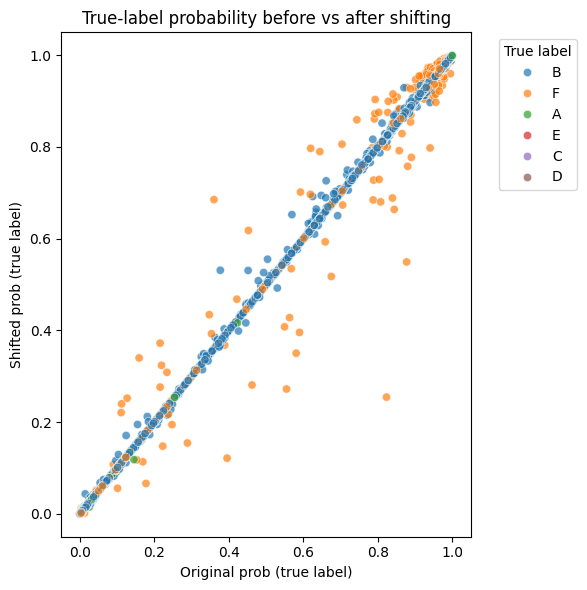

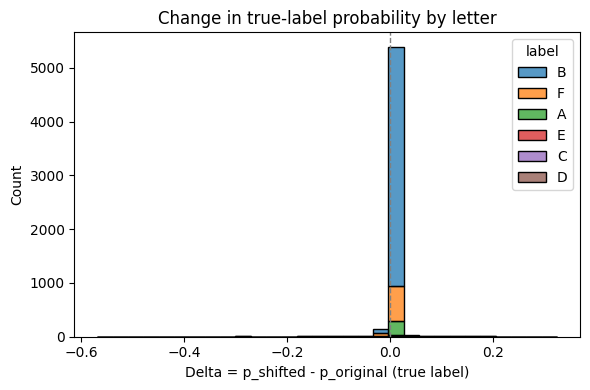

In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Inputs: two DataFrames with per-sample probs
# Assumed columns: annotation_id, action_uid, label (true letter), choices_probs (dict of letter->prob)
# df_orig = pd.read_pickle("re_eval_results_22.pkl")          # original evaluation (e.g., A,B,F)
# df_shift = pd.read_pickle("re_eval_results_23.pkl")    # shifted/renamed choices (e.g., A,B,C mapped from A,B,F)

# Merge on a unique key; adjust keys if you use a different identifier
key_cols = ["annotation_id", "action_uid"]
merged = df_orig[key_cols + ["label", "choices_probs"]].merge(
    df_shift[key_cols + ["choices_probs"]],
    on=key_cols,
    suffixes=("_orig", "_shift")
)

# Extract probabilities for the true label from both runs
merged["p_orig"] = merged.apply(lambda r: r["choices_probs_orig"].get(r["label"], 0.0), axis=1)
merged["p_shift"] = merged.apply(lambda r: r["choices_probs_shift"].get(r["label"], 0.0), axis=1)
merged["delta"] = merged["p_shift"] - merged["p_orig"]

# Scatter: original vs shifted probability for the true label
plt.figure(figsize=(6, 6))
ax = sns.scatterplot(
    data=merged,
    x="p_orig",
    y="p_shift",
    hue="label",  # color by true letter A–F
    palette="tab10",
    alpha=0.7,
)
ax.plot([0, 1], [0, 1], "--", color="gray", linewidth=1)
ax.set_xlabel("Original prob (true label)")
ax.set_ylabel("Shifted prob (true label)")
ax.set_title("True-label probability before vs after shifting")
ax.legend(title="True label", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Delta distribution by letter
plt.figure(figsize=(6, 4))
sns.histplot(data=merged, x="delta", hue="label", multiple="stack", bins=30, palette="tab10")
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.xlabel("Delta = p_shifted - p_original (true label)")
plt.title("Change in true-label probability by letter")
plt.tight_layout()

plt.show()


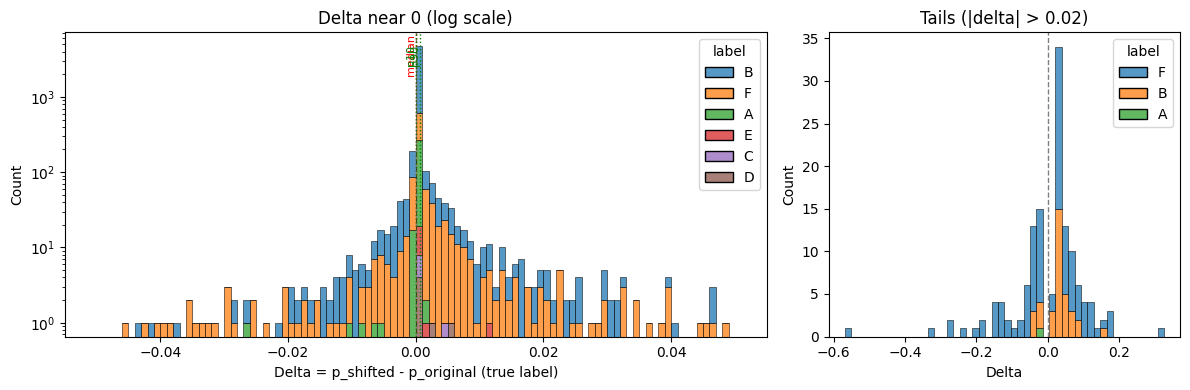

In [209]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# assumes `merged` already has `delta` and `label` columns
eps = 1e-6
merged["delta_clipped"] = merged["delta"].clip(-0.6, 0.6)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={"width_ratios": [2, 1]})

# Panel 1: near-zero, log-counts to see tiny shifts
sns.histplot(
    data=merged,
    x="delta_clipped",
    hue="label",
    bins=100,
    binrange=(-0.05, 0.05),
    multiple="stack",
    ax=axes[0],
)
axes[0].set_yscale("log")
axes[0].set_title("Delta near 0 (log scale)")
axes[0].set_xlabel("Delta = p_shifted - p_original (true label)")
axes[0].axvline(0, color="gray", linestyle="--", linewidth=1)

# Panel 2: tails only
sns.histplot(
    data=merged[(merged["delta_clipped"].abs() > 0.02)],
    x="delta_clipped",
    hue="label",
    bins=50,
    multiple="stack",
    ax=axes[1],
)
axes[1].set_title("Tails (|delta| > 0.02)")
axes[1].set_xlabel("Delta")
axes[1].axvline(0, color="gray", linestyle="--", linewidth=1)

# Optional: annotate medians/quantiles on panel 1
med = merged["delta"].median()
q10, q90 = merged["delta"].quantile([0.1, 0.9])
for v, c, lbl in [(med, "red", "median"), (q10, "green", "p10"), (q90, "green", "p90")]:
    axes[0].axvline(v, color=c, linestyle=":", linewidth=1)
    axes[0].text(v, axes[0].get_ylim()[1]*0.5, lbl, rotation=90, va="center", ha="right", color=c, fontsize=8)

plt.tight_layout()
plt.show()


In [220]:
df_shift[df_shift['pred_label'] != df_orig['pred_label']]
# sum(df_shift['pred_label'].isna())
# df_shift[df_shift['pred_label'].isna()]
df_shift[(df_shift['pred_label'] == 'F') & (df_orig['pred_label'] == 'C')]

,relative_idx,annotation_id,action_uid,pred_label,pred_action,pred_value,label,label_text,choices_probs,prob,test_split,text_output,pred_set0,correct
4798,53,be3b849b-8a4f-42ea-be6b-31a586883552,d55abc48-8493-46e6-ad03-5f0428f8b729,F,CLICK,None,A,A.,"{'A': 0.11819154024124146, 'C': 0.881503641605...",0.0,2,C. Action: CLICK,"[A, C, F]",False


In [221]:
df_orig[(df_shift['pred_label'] == 'F') & (df_orig['pred_label'] == 'C')]

,relative_idx,annotation_id,action_uid,pred_label,pred_action,pred_value,label,label_text,choices_probs,prob,test_split,text_output,pred_set0,correct
4798,53,be3b849b-8a4f-42ea-be6b-31a586883552,d55abc48-8493-46e6-ad03-5f0428f8b729,C,CLICK,None,A,A.,"{'A': 0.1451079249382019, 'C': 0.8545677661895...",0.854568,2,C. Action: CLICK,"[A, C, F]",False


Changed predictions: 0.003542330853701736


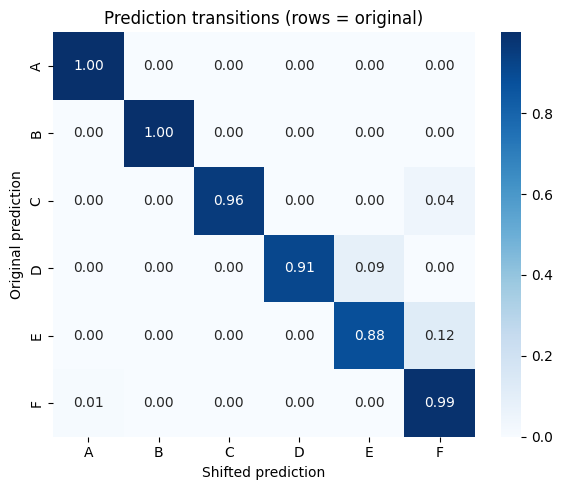

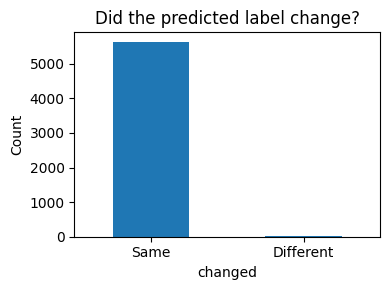

In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Inputs: df_orig and df_shift with the same keys, each having a column `pred_label`
key_cols = ["annotation_id", "action_uid"]  # adjust if you use a different key
merged = df_orig[key_cols + ["pred_label"]].merge(
    df_shift[key_cols + ["pred_label"]],
    on=key_cols,
    suffixes=("_orig", "_shift"),
)

# Flag changed predictions
merged["changed"] = merged["pred_label_orig"] != merged["pred_label_shift"]

# Overall change rate
print("Changed predictions:", merged["changed"].mean())

# Transition matrix: how original preds map to shifted preds
trans = pd.crosstab(
    merged["pred_label_orig"],
    merged["pred_label_shift"],
    normalize="index",  # rows sum to 1
)

plt.figure(figsize=(6, 5))
sns.heatmap(trans, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Shifted prediction")
plt.ylabel("Original prediction")
plt.title("Prediction transitions (rows = original)")
plt.tight_layout()

# Optional: bar showing changed vs unchanged counts
plt.figure(figsize=(4, 3))
merged["changed"].value_counts().reindex([False, True]).plot(kind="bar")
plt.xticks([0, 1], ["Same", "Different"], rotation=0)
plt.ylabel("Count")
plt.title("Did the predicted label change?")
plt.tight_layout()
plt.show()


In [131]:
mask = (df_orig['pred_label'] == 'F')&(df_shift['pred_label'] != 'F')
cols = ['pred_label']
merge = pd.concat([df_orig.loc[mask,cols], df_shift.loc[mask,cols + ['label']]], axis=1, keys=['orig','shift'])
# df_orig.loc[mask, ['choices_probs', 'pred_label']]
# merge
j = 32
x=df_orig.iloc[j].apply(lambda x: x if not isinstance(x, dict) else {k: round(v,4) for k,v in x.items()})
y=df_shift.iloc[j].apply(lambda x: x if not isinstance(x, dict) else {k: round(v,4) for k,v in x.items()})
# print(x)
# print(y)
# df_shift['pred_set'] = df_shift['choices_probs'].apply(lambda row: [ label for label, prob in row.items() if 1 - prob <= threshold])

df_shift = pd.read_pickle("re_eval_results_23.pkl")
df_shift['pred_set'] = df_shift['choices_probs'].apply(lambda row: [ label for label, prob in row.items() if 1 - prob <= threshold])
# df_orig['pred_set'] = df_orig['choices_probs'].apply(lambda row: [ label for label, prob in row.items() if 1 - prob <= threshold])

def remap_choice(row):
    label_map = {chr(65 + i): lab for i, lab in enumerate(row['pred_set'])}
    label = label_map.get(row['pred_label'],row['pred_label'])
    if label is None:
        print(f"Warning: pred_label {row['pred_label']} not in pred_set {row['pred_set']},map: {label_map}")
    return label

df_shift['pred_label'] = df_shift.apply(remap_choice, axis=1)
df_shift['correct'] = df_shift['pred_label'] == df_shift['label']
df_orig['correct'] = df_orig['pred_label'] == df_orig['label']
mask = df_shift['pred_label']!= df_orig['pred_label']
df_shift.loc[mask]['pred_label'] + ' ' + df_orig.loc[mask]['pred_label']
np.mean(df_shift['pred_label'] != df_orig['pred_label'])
np.mean(df_shift.loc[mask,"correct"])
np.mean(df_orig.loc[mask,"correct"])

np.float64(0.8507462686567164)

In [103]:
df_shift[['pred_label', 'pred_label']].count(axis=1)

0       2
1       2
2       2
3       2
4       2
       ..
5641    2
5642    2
5643    2
5644    2
5645    2
Length: 5646, dtype: int64

In [133]:
test_df[(test_df['pred_set_size'] > 1)]['pred_label'].value_counts()
# print_evaluation(test_df[(test_df['pred_set_size'] > 1)])
target_df = test_df[(test_df['pred_set_size'] > 1)]
# re_eval_df['correct'] = re_eval_df['pred_label'] == re_eval_df['label']
re_eval_df[(re_eval_df['correct'] == False)*(re_eval_df['choices_probs'].apply(len) < 3 ) ]

,relative_idx,annotation_id,action_uid,pred_label,pred_action,pred_value,label,label_text,choices_probs,prob,test_split,text_output,correct
61,61,a5dd5729-415a-4fe2-a840-4935bf9428d4,6f0fbffd-7b9a-4617-8ca0-dfe09d17fe84,A,None,None,B,B.\nAction: CLICK,"{'A': 0.97406005859375, 'B': 0.02440628781914711}",0.974060,0,A.,False
66,66,a2500e0b-9244-4f0e-b686-fa290c32b829,6c8dd194-8f21-40d5-965f-16f830080a9f,A,None,None,B,B.\nAction: CLICK,"{'A': 0.5458950400352478, 'B': 0.4510578215122...",0.545895,0,A.,False
100,101,c52fcdf7-1f23-4074-91bb-1a121af02a80,c4002058-d0c6-4345-b898-2e9f1d08a1d9,A,None,None,B,B.\nAction: CLICK,"{'A': 0.7016181349754333, 'B': 0.2920215725898...",0.701618,0,A.,False
118,119,4b8fb0aa-7d7c-4a22-bfd5-f09316a050c3,5eb1b7b7-713b-4401-b3ae-82972018bf46,A,None,None,B,B.\nAction: TYPE\nValue: chicago,"{'A': 0.5183804631233215, 'B': 0.477065771818161}",0.518380,0,A.,False
151,153,18fc60d7-aa69-4c07-9bf1-64543eae52c9,d5183310-fdfb-4274-b913-0399ca060327,A,None,None,F,F.\nAction: CLICK,"{'A': 0.7999187707901001, 'F': 0.1928970217704...",0.799919,0,A.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,651,a1b36184-1ae4-45fb-aa6a-b892d38ac771,cede5a17-3d73-4a78-abd4-28c93edaf0b4,A,None,None,B,B.\nAction: CLICK,"{'A': 0.8428732752799988, 'B': 0.1511935293674...",0.842873,2,A.,False
5421,685,aa835369-48e5-4e8f-8f36-49dcdaf5dcb1,3676f8c8-5054-42c7-bbac-f0df9a0a6413,A,None,None,B,B.\nAction: CLICK,"{'A': 0.9769367575645447, 'B': 0.0204986240714...",0.976937,2,A.,False
5432,696,b5b427a3-2a23-4847-af06-351d96e11c27,8b602827-65cb-401d-ad0e-e7ac11b66555,A,None,None,B,B.\nAction: CLICK,"{'A': 0.9989016056060791, 'B': 0.0004397292213...",0.998902,2,A.,False
5462,727,baf8a9d8-1788-4599-a9a9-dd22b619dcbf,265ecc26-5c87-4260-8286-56883ab57c6b,A,None,None,B,B.\nAction: CLICK,"{'A': 0.9930604696273804, 'B': 0.0032687948551...",0.993060,2,A.,False


NameError: name 'df_shifted' is not defined

In [ ]:
re_eval_df = pd.read_pickle("re_eval_results_22.pkl")
df_all = pd.concat([test_df[test_df['pred_set_size'] == 1], re_eval_df], ignore_index=True)

,relative_idx,annotation_id,action_uid,pred_label,pred_action,pred_value,label,label_text,choices_probs,prob,test_split,text_output,correct
12,12,91695df8-f256-47c9-8c37-06e8d0fc758f,f425232b-adc6-4047-b3ac-d56d8909b7df,A,None,None,B,B.\nAction: TYPE\nValue: 2,"{'A': 0.9711814522743225, 'B': 0.0267420373857...",0.971181,0,A.,False
25,25,9223f1b4-43ad-4636-9541-99ff9e6ad918,306d45f6-fbd1-497f-9272-8ac36e680dfb,A,None,None,F,F.\nAction: CLICK,"{'A': 0.9984234571456909, 'B': 0.0001089646175...",0.998423,0,A.,False
26,26,9223f1b4-43ad-4636-9541-99ff9e6ad918,37a912ac-ce6b-49e6-a217-bca2ec8dc56b,A,None,None,F,F.\nAction: CLICK,"{'A': 0.9975793957710266, 'B': 0.0002460335381...",0.997579,0,A.,False
28,28,9223f1b4-43ad-4636-9541-99ff9e6ad918,799e7c53-787c-4e67-a6a5-0e69d11898ca,A,None,None,F,F.\nAction: CLICK,"{'A': 0.9880466461181641, 'B': 0.0005599322612...",0.988047,0,A.,False
31,31,9223f1b4-43ad-4636-9541-99ff9e6ad918,8fd603de-4f5a-412b-b2d4-d6e9537a9ce3,A,None,None,F,F.\nAction: TYPE\nValue: 10/5/23,"{'A': 0.9194322824478149, 'B': 0.0003742944390...",0.919432,0,A.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5632,901,924476f8-37f9-42e2-bedf-64eeac0ce8b6,6b819181-7e0e-4931-a80a-ba865efddc47,A,None,None,F,F.\nAction: CLICK,"{'A': 0.7329919934272766, 'B': 0.0016496684402...",0.732992,2,A.,False
5633,902,924476f8-37f9-42e2-bedf-64eeac0ce8b6,1675d403-9653-40c0-8663-e32e551e762d,A,None,None,F,F.\nAction: CLICK,"{'A': 0.9444356560707092, 'B': 0.0017172939842...",0.944436,2,A.,False
5634,903,924476f8-37f9-42e2-bedf-64eeac0ce8b6,d0d06095-d269-49a6-b441-81cf2b243cf8,A,None,None,F,F.\nAction: CLICK,"{'A': 0.910167932510376, 'B': 0.00160806765779...",0.910168,2,A.,False
5635,904,924476f8-37f9-42e2-bedf-64eeac0ce8b6,dfaf20bb-0e0a-4791-8189-c80f72029c13,A,None,None,F,F.\nAction: CLICK,"{'A': 0.8849900364875793, 'B': 0.0015113170957...",0.884990,2,A.,False


In [36]:
re_eval_df = pd.read_pickle("re_eval_results2.pkl")
df_all = pd.concat([test_df[test_df['pred_set_size'] == 1], re_eval_df], ignore_index=True)
# re_eval_df['correct'] = re_eval_df['pred_label'] == re_eval_df['label']
# re_eval_df['pred_label'].value_counts()
print_evaluation(df_all)

Metrics for split: test_task
{'Ele. Acc': np.float64(80.11), 'Op. F1': np.float64(77.22), 'Step SR': np.float64(74.24), 'SR': np.float64(21.88)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(69.74), 'Op. F1': np.float64(67.21), 'Step SR': np.float64(64.43), 'SR': np.float64(16.64)}
Metrics for split: test_website
{'Ele. Acc': np.float64(65.59), 'Op. F1': np.float64(63.18), 'Step SR': np.float64(58.47), 'SR': np.float64(7.81)}
Metrics for overall dataset:
{'Ele. Acc': np.float64(70.97), 'Op. F1': np.float64(68.4), 'Step SR': np.float64(65.31), 'SR': np.float64(16.32)}


In [22]:
print_evaluation(test_df[test_df['pred_set_size'] > 1])

Metrics for split: test_task
{'Ele. Acc': np.float64(82.28), 'Op. F1': np.float64(79.68), 'Step SR': np.float64(76.3), 'SR': np.float64(23.12)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(72.82), 'Op. F1': np.float64(70.34), 'Step SR': np.float64(67.27), 'SR': np.float64(16.48)}
Metrics for split: test_website
{'Ele. Acc': np.float64(69.61), 'Op. F1': np.float64(67.19), 'Step SR': np.float64(62.67), 'SR': np.float64(8.59)}
Metrics for overall dataset:
{'Ele. Acc': np.float64(74.03), 'Op. F1': np.float64(71.53), 'Step SR': np.float64(68.21), 'SR': np.float64(16.54)}


In [ ]:
# re_eval_df = pd.read_pickle("re_eval_results2.pkl")
print_evaluation(re_eval_df)

x=re_eval_df['choices_probs'].apply(len)
# re_eval_df[x > 3]['choices_probs'].apply(lambda x: x.keys())


Metrics for split: test_task
{'Ele. Acc': np.float64(80.11), 'Op. F1': np.float64(77.22), 'Step SR': np.float64(74.24), 'SR': np.float64(21.88)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(69.81), 'Op. F1': np.float64(67.29), 'Step SR': np.float64(64.5), 'SR': np.float64(16.96)}
Metrics for split: test_website
{'Ele. Acc': np.float64(65.59), 'Op. F1': np.float64(63.18), 'Step SR': np.float64(58.47), 'SR': np.float64(7.81)}
Metrics for overall dataset:
{'Ele. Acc': np.float64(71.02), 'Op. F1': np.float64(68.45), 'Step SR': np.float64(65.36), 'SR': np.float64(16.54)}


0          (A, B, C, E, F)
9          (A, B, C, D, F)
11         (A, B, C, D, F)
12            (A, B, D, F)
13            (A, B, C, F)
               ...        
5634    (A, B, C, D, E, F)
5635    (A, B, C, D, E, F)
5638          (A, B, C, F)
5644          (A, B, C, F)
5645    (A, B, C, D, E, F)
Name: choices_probs, Length: 2268, dtype: object

In [24]:
re_eval_df = pd.read_pickle("re_eval_results4.pkl")
re_eval_df['correct'] = re_eval_df['pred_label'] == re_eval_df['label']
print_evaluation(re_eval_df)

Metrics for split: test_task
{'Ele. Acc': np.float64(64.18), 'Op. F1': np.float64(61.18), 'Step SR': np.float64(58.57), 'SR': np.float64(10.0)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(56.63), 'Op. F1': np.float64(55.05), 'Step SR': np.float64(52.39), 'SR': np.float64(8.96)}
Metrics for split: test_website
{'Ele. Acc': np.float64(53.74), 'Op. F1': np.float64(51.87), 'Step SR': np.float64(47.33), 'SR': np.float64(6.25)}
Metrics for overall dataset:
{'Ele. Acc': np.float64(57.55), 'Op. F1': np.float64(55.68), 'Step SR': np.float64(52.76), 'SR': np.float64(8.76)}


In [50]:
print_evaluation(test_df[test_df['pred_set_size'] > 1])

Metrics for split: test_task
{'Ele. Acc': np.float64(82.28), 'Op. F1': np.float64(79.68), 'Step SR': np.float64(76.3), 'SR': np.float64(23.12)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(72.82), 'Op. F1': np.float64(70.34), 'Step SR': np.float64(67.27), 'SR': np.float64(16.48)}
Metrics for split: test_website
{'Ele. Acc': np.float64(69.61), 'Op. F1': np.float64(67.19), 'Step SR': np.float64(62.67), 'SR': np.float64(8.59)}
Metrics for overall dataset:
{'Ele. Acc': np.float64(74.03), 'Op. F1': np.float64(71.53), 'Step SR': np.float64(68.21), 'SR': np.float64(16.54)}


In [75]:
print_evaluation(re_eval_df)

Metrics for split: test_task
{'Ele. Acc': np.float64(64.18), 'Op. F1': np.float64(61.18), 'Step SR': np.float64(58.57), 'SR': np.float64(10.0)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(56.63), 'Op. F1': np.float64(55.05), 'Step SR': np.float64(52.39), 'SR': np.float64(8.96)}
Metrics for split: test_website
{'Ele. Acc': np.float64(53.74), 'Op. F1': np.float64(51.87), 'Step SR': np.float64(47.33), 'SR': np.float64(6.25)}
Metrics for overall dataset:
{'Ele. Acc': np.float64(57.55), 'Op. F1': np.float64(55.68), 'Step SR': np.float64(52.76), 'SR': np.float64(8.76)}


In [ ]:
Metrics for split: test_task
{'Ele. Acc': np.float64(79.45), 'Op. F1': np.float64(80.77), 'Step SR': np.float64(73.46), 'SR': np.float64(20.0)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(68.85), 'Op. F1': np.float64(71.84), 'Step SR': np.float64(63.59), 'SR': np.float64(14.24)}
Metrics for split: test_website
{'Ele. Acc': np.float64(65.04), 'Op. F1': np.float64(67.99), 'Step SR': np.float64(57.93), 'SR': np.float64(7.03)}
Metrics for overall dataset:
{'Ele. Acc': np.float64(70.17), 'Op. F1': np.float64(72.87), 'Step SR': np.float64(64.53), 'SR': np.float64(14.24)}

In [60]:
print_evaluation(re_eval_df)

Metrics for split: test_task
{'Ele. Acc': np.float64(62.52), 'Op. F1': np.float64(59.8), 'Step SR': np.float64(57.15), 'SR': np.float64(10.0)}
Metrics for split: test_domain
{'Ele. Acc': np.float64(55.88), 'Op. F1': np.float64(54.31), 'Step SR': np.float64(51.72), 'SR': np.float64(8.48)}
Metrics for split: test_website
{'Ele. Acc': np.float64(52.99), 'Op. F1': np.float64(51.0), 'Step SR': np.float64(46.93), 'SR': np.float64(4.69)}
Metrics for overall dataset:
{'Ele. Acc': np.float64(56.64), 'Op. F1': np.float64(54.81), 'Step SR': np.float64(52.0), 'SR': np.float64(8.21)}


In [47]:
test_df[(test_df_merged["correct"] == False)&(test_df["correct"] == True)]['pred_label'].value_counts()

pred_label
B    238
F     49
A      3
D      1
Name: count, dtype: int64

In [39]:
answer = answer_df.iloc[37]
print(answer['annotation_id'],'|' ,answer['action_uid'])
print(answer['oracle_answer'])

a52fcf7a-50aa-4256-8796-654b3dc3adac | f78348d5-7bb5-4175-961c-4facb4dff324
Click the "Tickets & Passes" link located in the navigation menu, which is labeled with the text "Tickets & Pass


In [46]:
test_df_merged['correct'] = test_df_merged['pred_label'] == test_df_merged['label']
test_df_merged[(test_df_merged["correct"] == False)&(test_df["correct"] == True)]['pred_label'].value_counts()

pred_label
A    283
E      3
C      3
B      2
Name: count, dtype: int64

In [24]:
re_eval_df = pd.read_pickle("re_eval_results.pkl")
test_df_copy = pd.read_pickle("test_results.pkl")
# keys that identify a row
merge_keys = ["annotation_id", "action_uid"]

# align indexes for update
re_eval_aligned = re_eval_df.set_index(merge_keys)
test_df_aligned = test_df_copy.set_index(merge_keys)

# overwrite existing cols where re-eval has data
test_df_aligned.update(re_eval_aligned)

# back to a regular DataFrame
test_df_merged = test_df_aligned.reset_index()
test_df_merged.head()

,annotation_id,action_uid,relative_idx,pred_label,pred_action,pred_value,label,label_text,choices_probs,prob,test_split,labels_tokens
0,91695df8-f256-47c9-8c37-06e8d0fc758f,73e0e7ed-d784-4b7a-a06c-48324e44ce7b,0,B,CLICK,None,B,B.\nAction: CLICK,"{'A': 0.025247467681765556, 'B': 0.97417777776...",0.974178,0,B.\nAction: CLICK\n
1,91695df8-f256-47c9-8c37-06e8d0fc758f,ea2865e4-2858-478c-bf83-93d576cad774,1,B,CLICK,None,B,B.\nAction: CLICK,"{'A': 0.0035883907694369555, 'B': 0.9961434006...",0.996143,0,B.\nAction: CLICK\n
2,91695df8-f256-47c9-8c37-06e8d0fc758f,c70a5d9b-8777-4ff7-a17d-1f76012e14ba,2,B,TYPE,08817,B,B.\nAction: TYPE\nValue: 08817,"{'A': 0.012266379781067371, 'B': 0.98672604560...",0.986726,0,B.\nAction: TYPE\nValue: 08817
3,91695df8-f256-47c9-8c37-06e8d0fc758f,3e671043-cab2-4e44-a1ce-3ed9de91d16b,3,B,CLICK,None,B,B.\nAction: CLICK,"{'A': 0.02020300179719925, 'B': 0.978624403476...",0.978624,0,B.\nAction: CLICK\n
4,91695df8-f256-47c9-8c37-06e8d0fc758f,60888ab2-b605-4886-8dac-6ba72b6cde0a,4,B,CLICK,None,B,B.\nAction: CLICK,"{'A': 0.006945854984223843, 'B': 0.99270260334...",0.992703,0,B.\nAction: CLICK\n


In [32]:
len(test_df)

5799

In [33]:
len(test_df_merged)

5799

In [25]:
test_df_copy[test_df["pred_set_size"] > 1] = re_eval_df
test_df_copy.head()

,relative_idx,annotation_id,action_uid,pred_label,pred_action,pred_value,label,label_text,choices_probs,prob,test_split,labels_tokens
0,0.0,91695df8-f256-47c9-8c37-06e8d0fc758f,73e0e7ed-d784-4b7a-a06c-48324e44ce7b,B,CLICK,None,B,B.\nAction: CLICK,"{'A': 0.025247467681765556, 'B': 0.97417777776...",0.974178,0.0,B. Action: CLICK
1,1.0,91695df8-f256-47c9-8c37-06e8d0fc758f,ea2865e4-2858-478c-bf83-93d576cad774,B,CLICK,None,B,B.\nAction: CLICK,"{'A': 0.0035883907694369555, 'B': 0.9961434006...",0.996143,0.0,B. Action: CLICK
2,2.0,91695df8-f256-47c9-8c37-06e8d0fc758f,c70a5d9b-8777-4ff7-a17d-1f76012e14ba,B,TYPE,08817,B,B.\nAction: TYPE\nValue: 08817,"{'A': 0.012266379781067371, 'B': 0.98672604560...",0.986726,0.0,B. Action: TYPE Value: 08817
3,3.0,91695df8-f256-47c9-8c37-06e8d0fc758f,3e671043-cab2-4e44-a1ce-3ed9de91d16b,B,CLICK,None,B,B.\nAction: CLICK,"{'A': 0.02020300179719925, 'B': 0.978624403476...",0.978624,0.0,B. Action: CLICK
4,4.0,91695df8-f256-47c9-8c37-06e8d0fc758f,60888ab2-b605-4886-8dac-6ba72b6cde0a,B,CLICK,None,B,B.\nAction: CLICK,"{'A': 0.006945854984223843, 'B': 0.99270260334...",0.992703,0.0,B. Action: CLICK


In [ ]:
# gc.collect()         
# torch.cuda.empty_cache()       
# torch.cuda.ipc_collect()
from torch.nn import functional as F


example = test_df[test_df['correct'] != True].iloc[bad_index]
print(example[['pred_label','pred_action','pred_value', 'label_text','choices_probs', 'pred_set']])


print(choices_probs)
print([lab for lab, p in choices_probs.items() if 1 - p <= threshold])

251 110
B. Action: CLICK 
-----
pred_label                                                       A
pred_action                                                   None
pred_value                                                    None
label_text                                       B.\nAction: CLICK
choices_probs    {'A': 0.9799697995185852, 'B': 0.0166981853544...
pred_set                                        [A, B, C, D, E, F]
Name: 112, dtype: object
{'A': 0.025247544050216675, 'B': 0.9741799235343933, 'C': 0.00011176805128343403, 'D': 0.0001968987926375121, 'E': 5.2311141189420596e-05, 'F': 0.000123833044199273}
['A', 'B', 'D']


In [162]:
def temp(d):
    d = {'b':3}

temp_dict = {'a':2}
temp(temp_dict)
temp_dict

{'a': 2}

In [ ]:
A.
-----
pred_label                                                       A
pred_action                                                   None
pred_value                                                    None
label_text                                       F.\nAction: CLICK
choices_probs    {'A': 0.9988712668418884, 'B': 0.0001807211519...
pred_set                                              [A, B, E, F]
Name: 25, dtype: object
{'A': 0.9989086389541626, 'B': 0.00012537989823613316, 'E': 0.0001505803084000945, 'F': 0.0003164380614180118}
['A', 'F']

np.int64(29)

In [ ]:

print(html)
print(rest)

<html> <body> <iframe fb:page facebook social plugin f22569b367eaa4> <div feed> <div> <div> <div> Ticket Center </div> <a id=0> <span> about 6 years ago </span> </a> </div> <div id=1> <p id=2> Jeff Dunham is making everyone laugh with those puppets of his. Haven't seen him live yet? No worries... grab your </p> <a id=3> http://www.ticketcenter.com//perfectly-unbalanced-jeff-du/ </a> </div> </div> </div> </iframe> <tr> <th> Jul 2023 </th> <i id=4 /> </tr> </body> </html>
Based on the HTML webpage above, try to complete the following task:
Task: Browse the venues that are playing the Wicked show from Oct 5 to Oct 24 2023
Previous actions:
[textbox]  Search for artists, teams or venues... -> TYPE: Wicked
[option]  Wicked -> CLICK
[button]  All dates -> CLICK
[textbox]  Select Date Range -> CLICK
[columnheader]   -> CLICK

guidence: None of the provided options are relevant to browsing venues for the Wicked show from Oct 5 to Oct 24,
What should be the next action? Please select from the 

In [ ]:
"""
user

### ROLE
You are a helpful human annotator assisting a web navigation agent. The agent is confused and has narrowed down the next step to a few likely options, but it cannot distinguish which one is correct.
### USER TASK
Rent a truck with the lowest rent with two dozen furniture pads for 100 miles at zip 08817 on April 12 at 2:30 pm rented truck is to be returned to the exact location and date, and the pickup and drop off will be at the nearest location.
Previous Actions: 
[button]  Reservations -> HOVER
[link]  Budget Truck -> CLICK
[textbox]  US City,State or Zip Code -> TYPE: 08817
[textbox]  mm/dd/yyyy -> CLICK
[link]  12 -> CLICK
[select]  Select Pick-up Time -> SELECT: 02:30 PM
[input]   -> CLICK
[button]  Find Your Truck -> CLICK
[button]  Select Truck -> CLICK
[input]   -> TYPE: 100
[button]  Continue to Location  -> CLICK
[button]  Select Pick-up Location -> CLICK


### HTML CONTEXT
<html> <div> <div> <a choose your add-ons /> <input id=0 text 0 /> <a choose your add-ons /> </div> <ul id=1> <li id=2> <a id=3 reservations> Reservations </a> </li> <li id=4> <a commercial rental add-ons> Commercial Rental Add-ons </a> </li> <a commercial account> Commercial Account </a> </ul> </div> </html>

### AVAILABLE OPTIONS
The smaller model has provided the following possible actions:
A. None of the above
B. <input id=0 text 0 />
C. <ul id=1> <li id=2> <a id=3 reservations> Reservations </a> </li>
D. <li id=2> <a id=3 reservations> Reservations </a> </li>
E. <a id=3 reservations> Reservations </a>
F. <li id=4> <a commercial rental add-ons> Commercial Rental Add-ons </a>


### THE AMBIGUOUS OPTIONS (Prediction Set)
The correct action is very likely one of the following. Analyze them carefully:
['A', 'B', 'D', 'F']

### INSTRUCTIONS
1. Analyze the User Task and the HTML Context (and the screenshot if available).
2. Identify the single correct element from the Prediction Set options above.
3. Formulate a natural language instruction to guide the agent to that specific element.
4. **Crucial:** Your instruction must be "Discriminative". Mention specific text labels, icons, or the location of the element to help the agent separate it from the other options.

### RESPONSE FORMAT
Provide your response as a direct command to the agent. 
- If the action is clicking, describe exactly what to click.
- If the action is typing, specify exactly what to type and where.

Example 1 (Click): "Click the 'Menu' button found in the top-left navigation bar."
Example 2 (Type): "Type 'The Matrix' into the search bar located in the header."
Example 3 (Select): "Select 'Price: Low to High' from the dropdown menu."

Your Response:  

assistant
Click the input field labeled "0" under the "Furniture Pad" add-on section to set the quantity to two dozen.
"""

In [22]:
del oracle
gc.collect()         
torch.cuda.empty_cache()       
torch.cuda.ipc_collect()

In [ ]:
# df = pd.DataFrame(test_task_ds)
# len(df.groupby("annotation_id"))
# subsample[0]['action_reprs']

# test_domain_ds = ds['test_domain']
# test_task_ds = ds['test_task']
# test_website_ds = ds['test_website']
count = 0
missing_count = 0
mulit = {}
missing = {}
for i, x in enumerate(test_dict['test_website'].data):
    if len(x['pos_candidates']) > 1:
        count += 1
        mulit[i] = x['annotation_id']
    if len(x['pos_candidates']) == 0:
        # print('Missing pos_candidates:', x['annotation_id'])
        missing_count += 1
        missing[i] = x['annotation_id']

print("Number of samples with multiple positive candidates in test_website:", count)
print("Number of samples with missing positive candidates in test_website:", missing_count)